In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..', '..'))
sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Get physical constants from Scipy
import scipy.constants as con
## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m
kb = con.physical_constants['Boltzmann constant in eV/K'][0]

import scipy.integrate as int

import scipy.io as sio

import scipy.optimize as opt

from misloc_mispol_package.parameterize import displaced_osc_model as dom


In [2]:
## This needs to be in a seperate cell from the imports
## Matplotlib settings
## inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 300,  # to adjust notebook inline plot size
    'savefig.dpi': 300,  # to adjust notebook inline plot size
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
#     'figure.figsize': [3.5, 2.625], # 4 x 3
#     'figure.figsize': [4, 3], # 4 x 3
    'figure.figsize': [4*1.125, 3*1.125], # 4x3, full slide in keynote
    'font.family': 'serif',
    'figure.max_open_warning':100
}
mpl.rcParams.update(params)


In [3]:
test_script_d = 1.5

In [4]:
dom.invcmtohz(2500)*hbar

0.30996049346900717

In [5]:
dom.invcmtohz(600)*hbar

0.07439051843256171

In [6]:
def sig_prime(omega, t): 
    return np.real(np.exp(1j*(omega)*t*1e-15 - dom.g(t, test_script_d)))

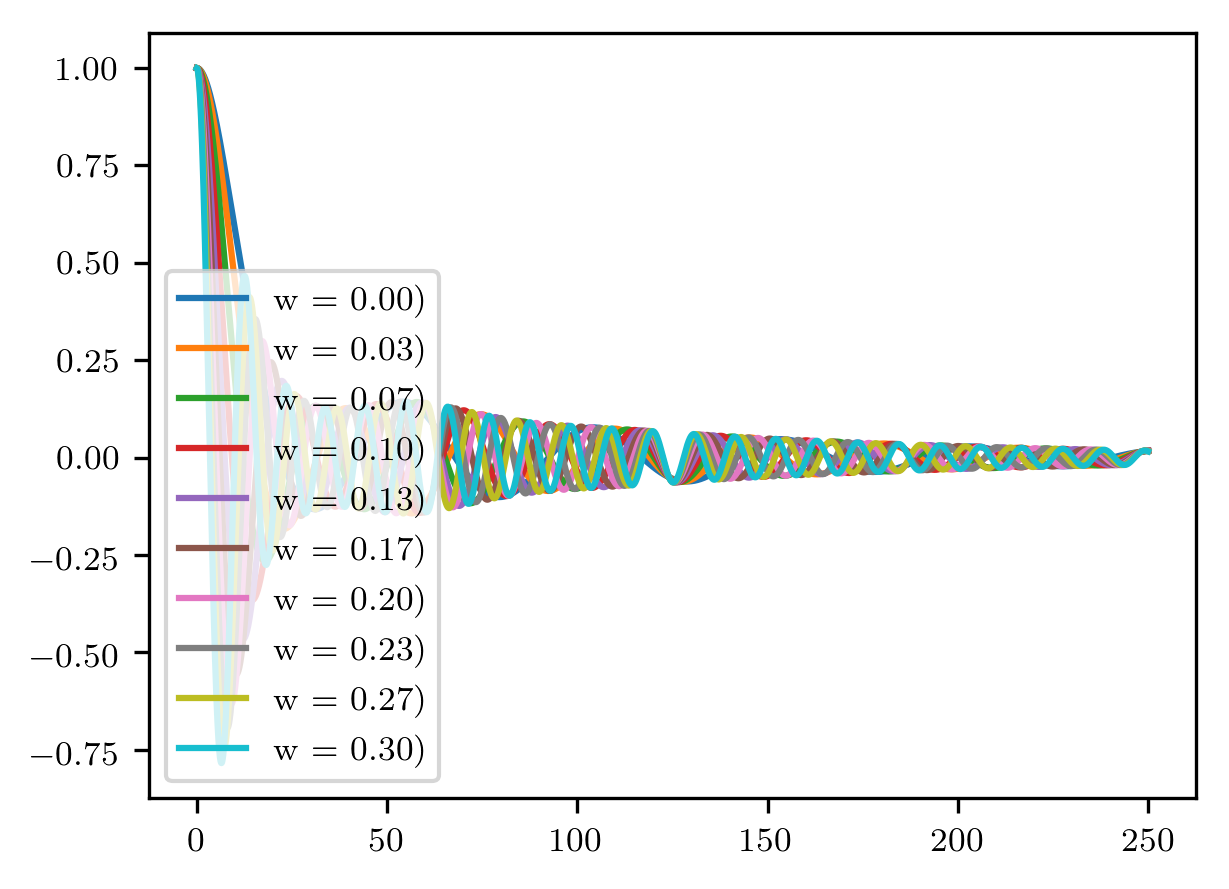

In [7]:
omegas = np.linspace(0, .3/hbar, 10)
time_points = 10000
t_bound = 250
for w in omegas:
    plt.plot(
        np.linspace(0, t_bound, time_points), 
        sig_prime(w, np.linspace(0, t_bound, time_points)),
        label=f'w = {(hbar*w):.2f})'
        )
#     plt.xlim([0,.1])
        
plt.legend()

In [8]:
omegas[:]

array([0.00000000e+00, 5.06422487e+13, 1.01284497e+14, 1.51926746e+14,
       2.02568995e+14, 2.53211243e+14, 3.03853492e+14, 3.54495741e+14,
       4.05137990e+14, 4.55780238e+14])

```
model = mol_fluo_model(
    num_vib_modes=2,
    script_d=[1, 2]
    hbar_omega_0=[1, 2]
    hbar_gamma=[1, 2]
    )

model.emisson(mode=1)

```

In [9]:
test_hbar_omega_eg_0 = 2.3
test_script_d = 1.2
# test_hbar_omega_0 = hbar * invcmtohz(300)
# test_hbar_gamma = hbar * invcmtohz(400)
test_hbar_omega_0 = .17
test_hbar_gamma = .1
test_t_bound = 1000
test_t_points = 10000
test_T = 350

In [10]:
test_model_1_mode = dom.mol_fluo_model(
    num_vib_modes=1,
    hbar_omega_eg_0=2.3,
    script_d=[1.2],
    hbar_omega_0=[.17],
    hbar_gamma=[.1],
    T=350,)

In [11]:
test_model_1_mode.emission_lineshape(omegas)

array([-0.04964811, -0.04040771, -0.02825012, -0.01387104,  0.00186923,
        0.01799543,  0.03347584,  0.04728616,  0.05847499,  0.06622686])

In [12]:
hbar_omegas = np.linspace(1.8, 2.7, 100)

# plt.plot(hbar_omegas, test_model_1_mode.emission_lineshape(
#     hbar_omegas/hbar,
#     t_bound = 1000,
#     t_points = 10000))

```
test_hbar_omega_eg_0 = 2.3
test_script_d = 2.3
# test_hbar_omega_0 = hbar * invcmtohz(300)
# test_hbar_gamma = hbar * invcmtohz(400)
test_hbar_omega_0 = .033
test_hbar_gamma = .01
test_t_bound = 1000
test_t_points = 10000
test_T = 350
```

In [13]:
test_model_2_mode = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.3,
    script_d=[1.2, 3.6],
    hbar_omega_0=[.17, .033],
    hbar_gamma=[.1, .001],
    T=350,)

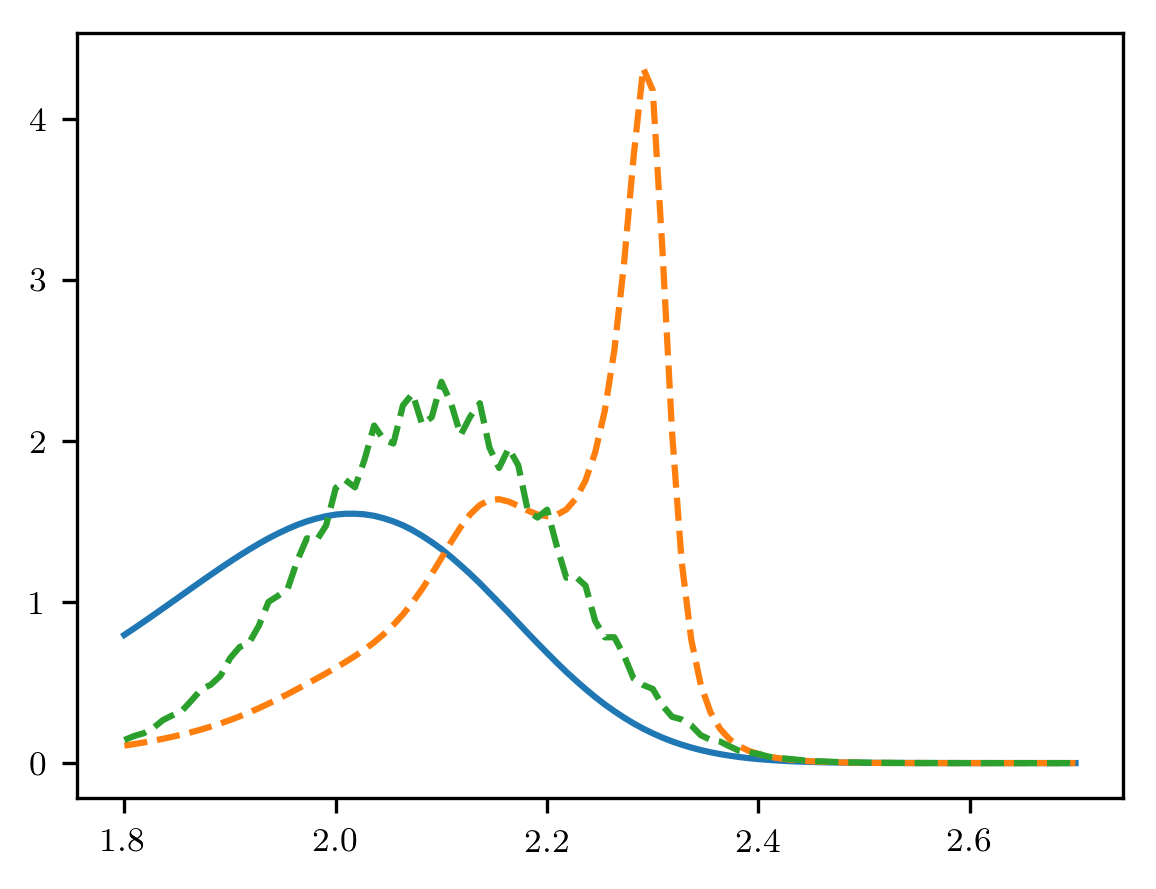

In [14]:
hbar_omegas = np.linspace(1.8, 2.7, 100)

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    t_bound = 1000,
    t_points = 10000))

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000), ls='--')

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000), ls='--')

# plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
#     hbar_omegas/hbar,
#     t_bound = 1000,
#     t_points = 10000))

For implementation of the simpler fluorescence model, let me make sure I know how class inheritence works. 

In [15]:
class Parent(object):
    
    def __init__(self):
        pass
    
    def func_depends(self):
        return self.func_1()
    
    def func_1(self):
        return 1
    


In [16]:
test_parent_inst = Parent()

In [17]:
test_parent_inst.func_depends()

1

In [18]:
class Child(Parent):
    
    def __init__(self):
        Parent.__init__(self)
    
    def func_1(self):
        return 2


In [19]:
test_child = Child()

In [20]:
test_child.func_depends()

2

Yup, I should be able to reuse most of the implementation. 

In [23]:
test_model_2_mode_anda = dom.anda_mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.3,
    script_d=[1.2, 3.6],
    hbar_omega_0=[.17, .033],
    hbar_gamma=[.1, .1],
    T=350,)

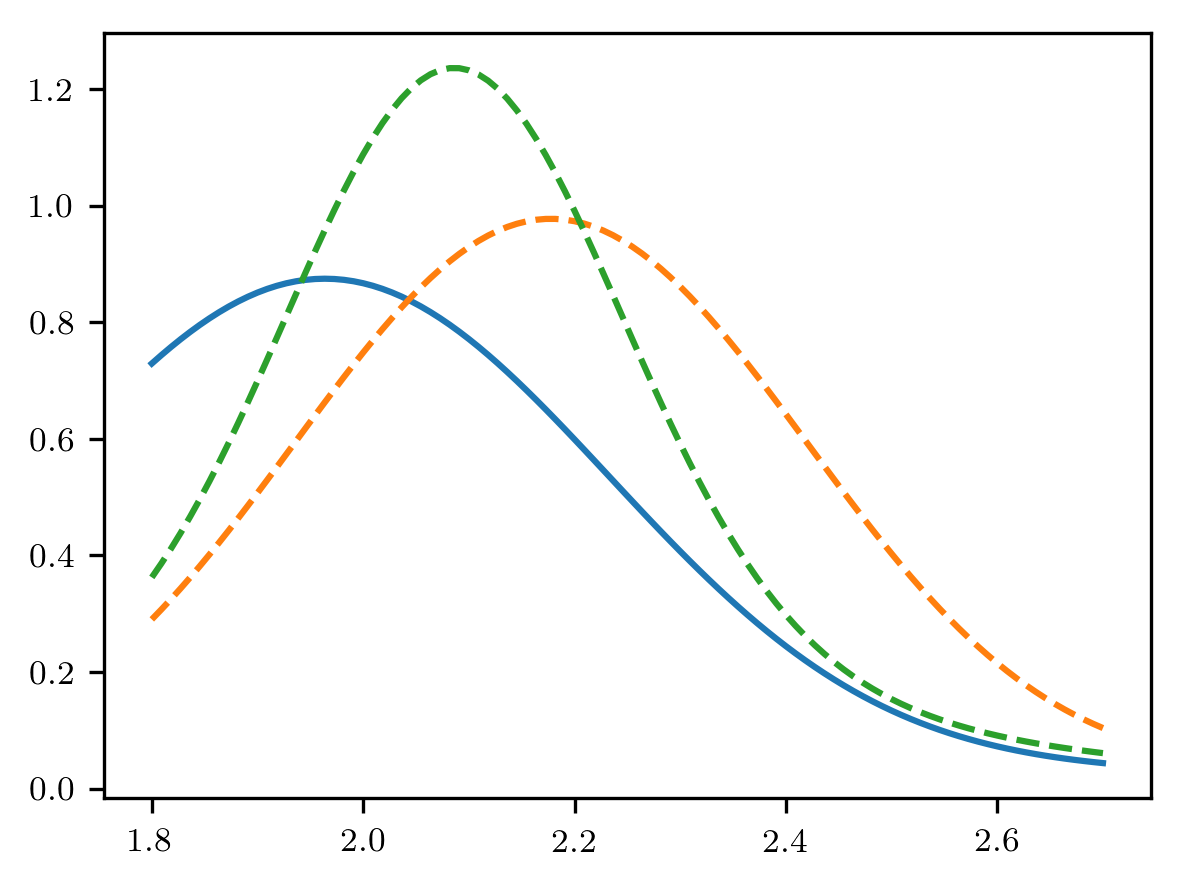

In [24]:

hbar_omegas = np.linspace(1.8, 2.7, 100)

plt.plot(hbar_omegas, test_model_2_mode_anda.emission_lineshape(
    hbar_omegas/hbar,
    t_bound = 1000,
    t_points = 10000))

plt.plot(hbar_omegas, test_model_2_mode_anda.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000), ls='--')

plt.plot(hbar_omegas, test_model_2_mode_anda.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000), ls='--')

## Comparing Anda and Mukamel models

(0, 3.7084424729847107)

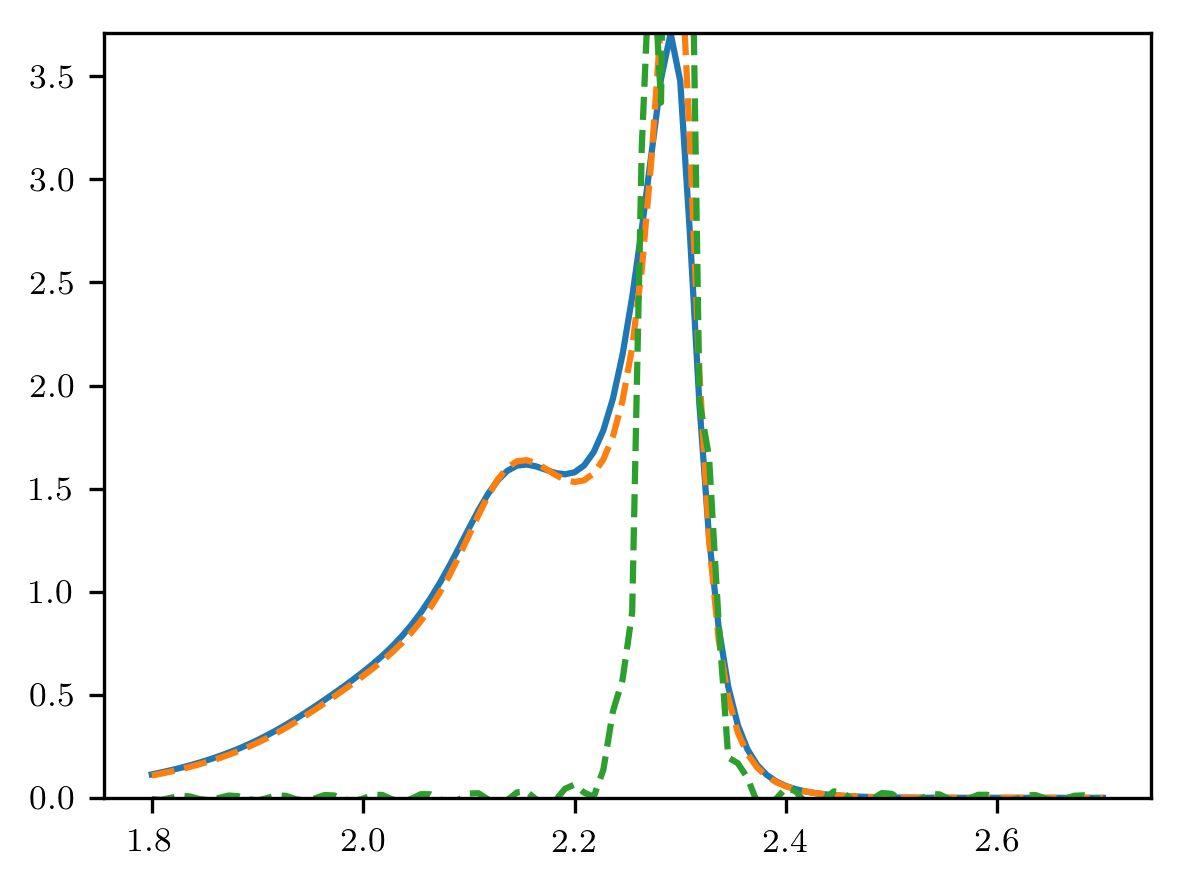

In [36]:
test_model_2_mode = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.3,
    script_d=[1.2, .5],
    hbar_omega_0=[.17, .033],
    hbar_gamma=[.1, .01],
    T=350,)

hbar_omegas = np.linspace(1.8, 2.7, 100)

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    t_bound = 1000,
    t_points = 10000))

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000), ls='--')

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000), ls='--')

plt.ylim((0, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    t_bound = 1000,
    t_points = 10000).max()))
# plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
#     hbar_omegas/hbar,
#     t_bound = 1000,
#     t_points = 10000))

# test_model_2_mode_anda = dom.anda_mol_fluo_model(
#     num_vib_modes=2,
#     hbar_omega_eg_0=2.3,
#     script_d=[1.2, 3.6],
#     hbar_omega_0=[.17, .033],
#     hbar_gamma=[.1, .1],
#     T=350,)

Text(0, 0.5, 'Normalized Intensity')

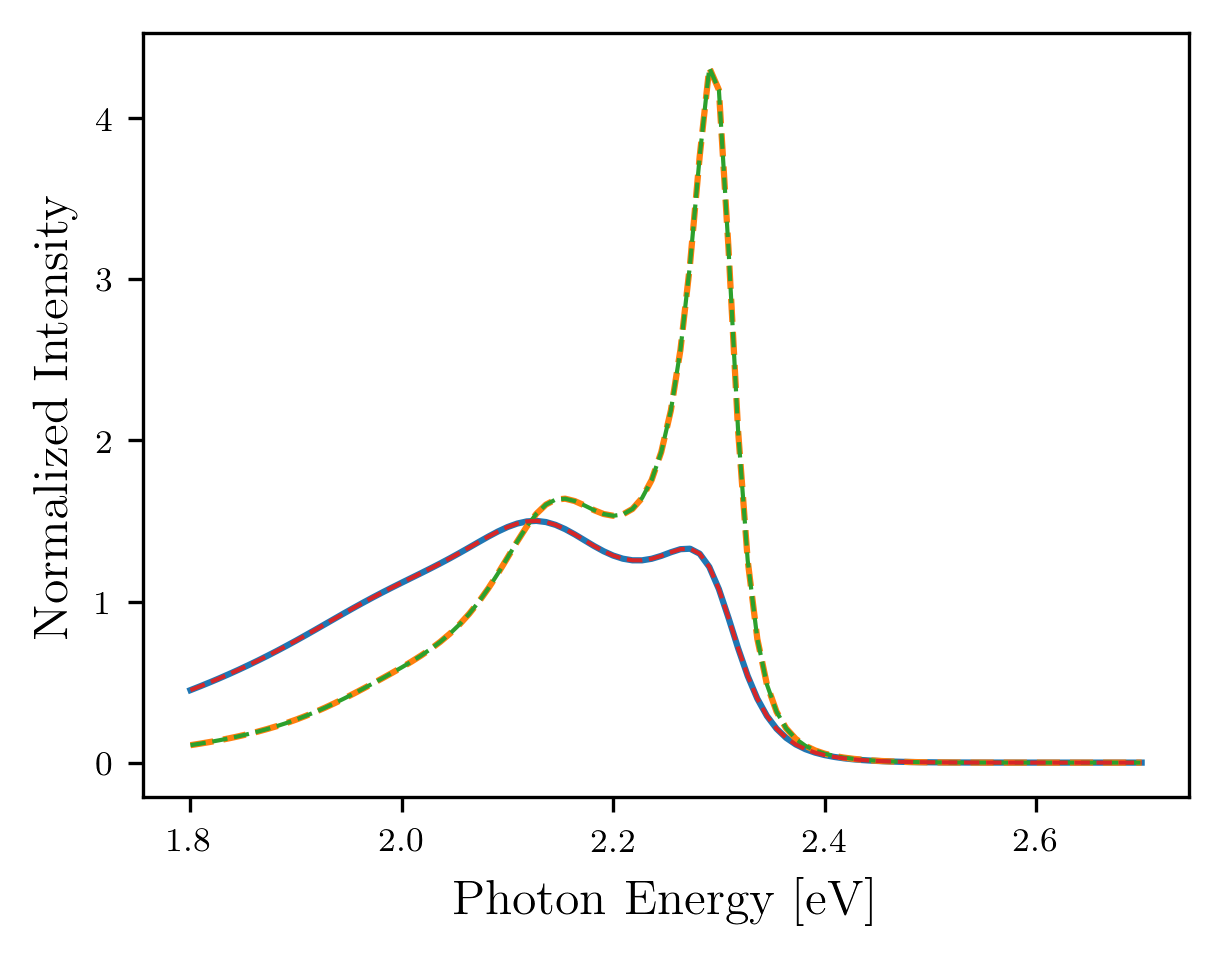

In [50]:
test_model_2_mode = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.3,
    script_d=[1.2, 1.2],
    hbar_omega_0=[.17, .17],
    hbar_gamma=[.1, .1],
    T=350,)

hbar_omegas = np.linspace(1.8, 2.7, 100)

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    t_bound = 1000,
    t_points = 10000))

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000), ls='--')

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000), ls='--', lw=1)

# plt.ylim((0, test_model_2_mode.emission_lineshape(
#     hbar_omegas/hbar,
#     t_bound = 1000,
#     t_points = 10000).max()))


test_model_1_mode_dubS = dom.mol_fluo_model(
    num_vib_modes=1,
    hbar_omega_eg_0=2.3,
    script_d=[1.2*2**0.5],
    hbar_omega_0=[.17, ],
    hbar_gamma=[.1,],
    T=350,)

plt.plot(
    hbar_omegas, 
    test_model_1_mode_dubS.emission_lineshape(
        hbar_omegas/hbar,
        t_bound = 1000,
        t_points = 10000),
    lw=1,
    ls='--'
    )

plt.xlabel('Photon Energy [eV]')
plt.ylabel('Normalized Intensity')


Text(0, 0.5, 'Normalized Intensity')

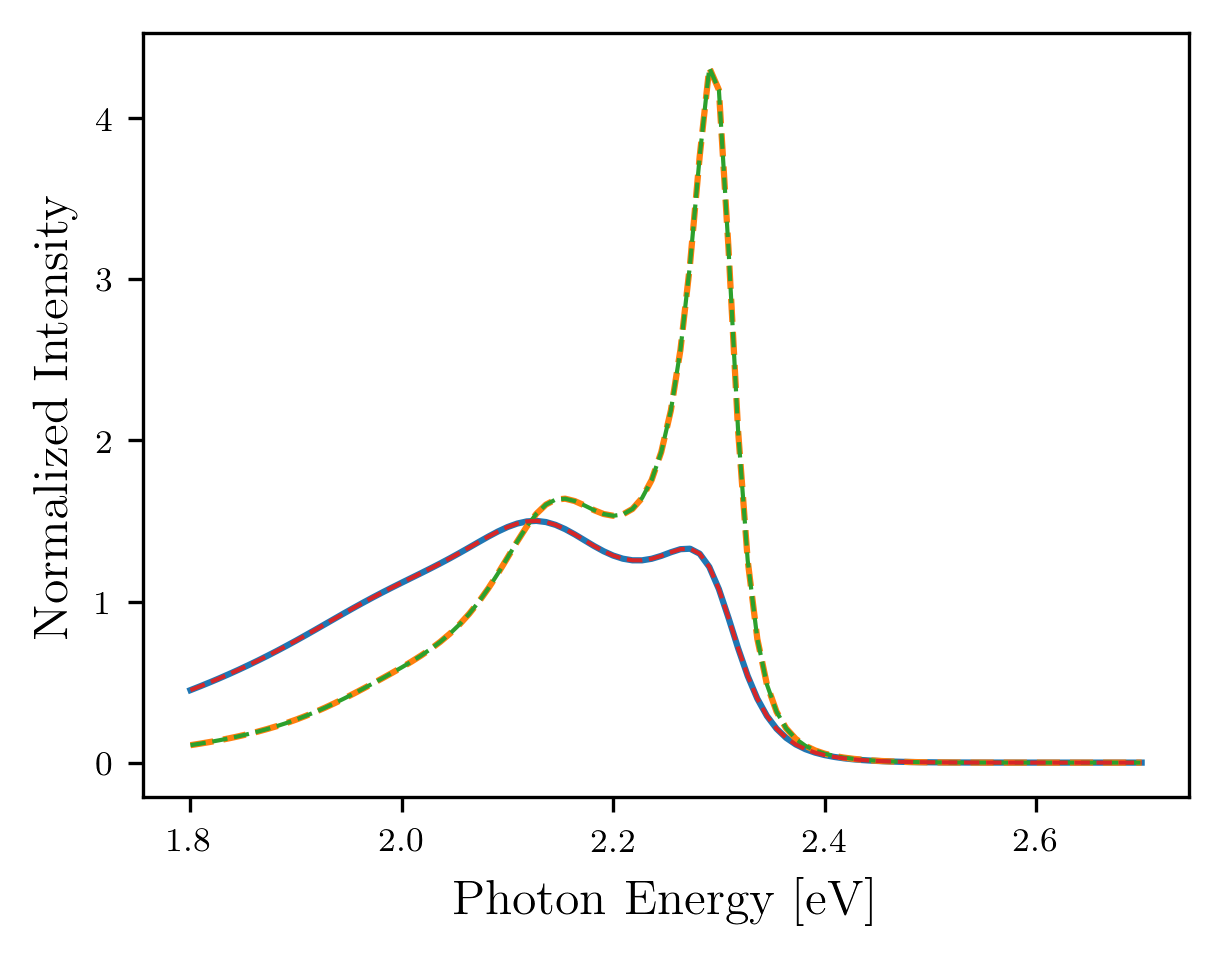

In [50]:
test_model_2_mode = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.3,
    script_d=[1.2, 1.2],
    hbar_omega_0=[.17, .17],
    hbar_gamma=[.1, .1],
    T=350,)

hbar_omegas = np.linspace(1.8, 2.7, 100)

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    t_bound = 1000,
    t_points = 10000))

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000), ls='--')

plt.plot(hbar_omegas, test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000), ls='--', lw=1)

# plt.ylim((0, test_model_2_mode.emission_lineshape(
#     hbar_omegas/hbar,
#     t_bound = 1000,
#     t_points = 10000).max()))


plt.xlabel('Photon Energy [eV]')
plt.ylabel('Normalized Intensity')


lets try fitting the cyanine fluorescence

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

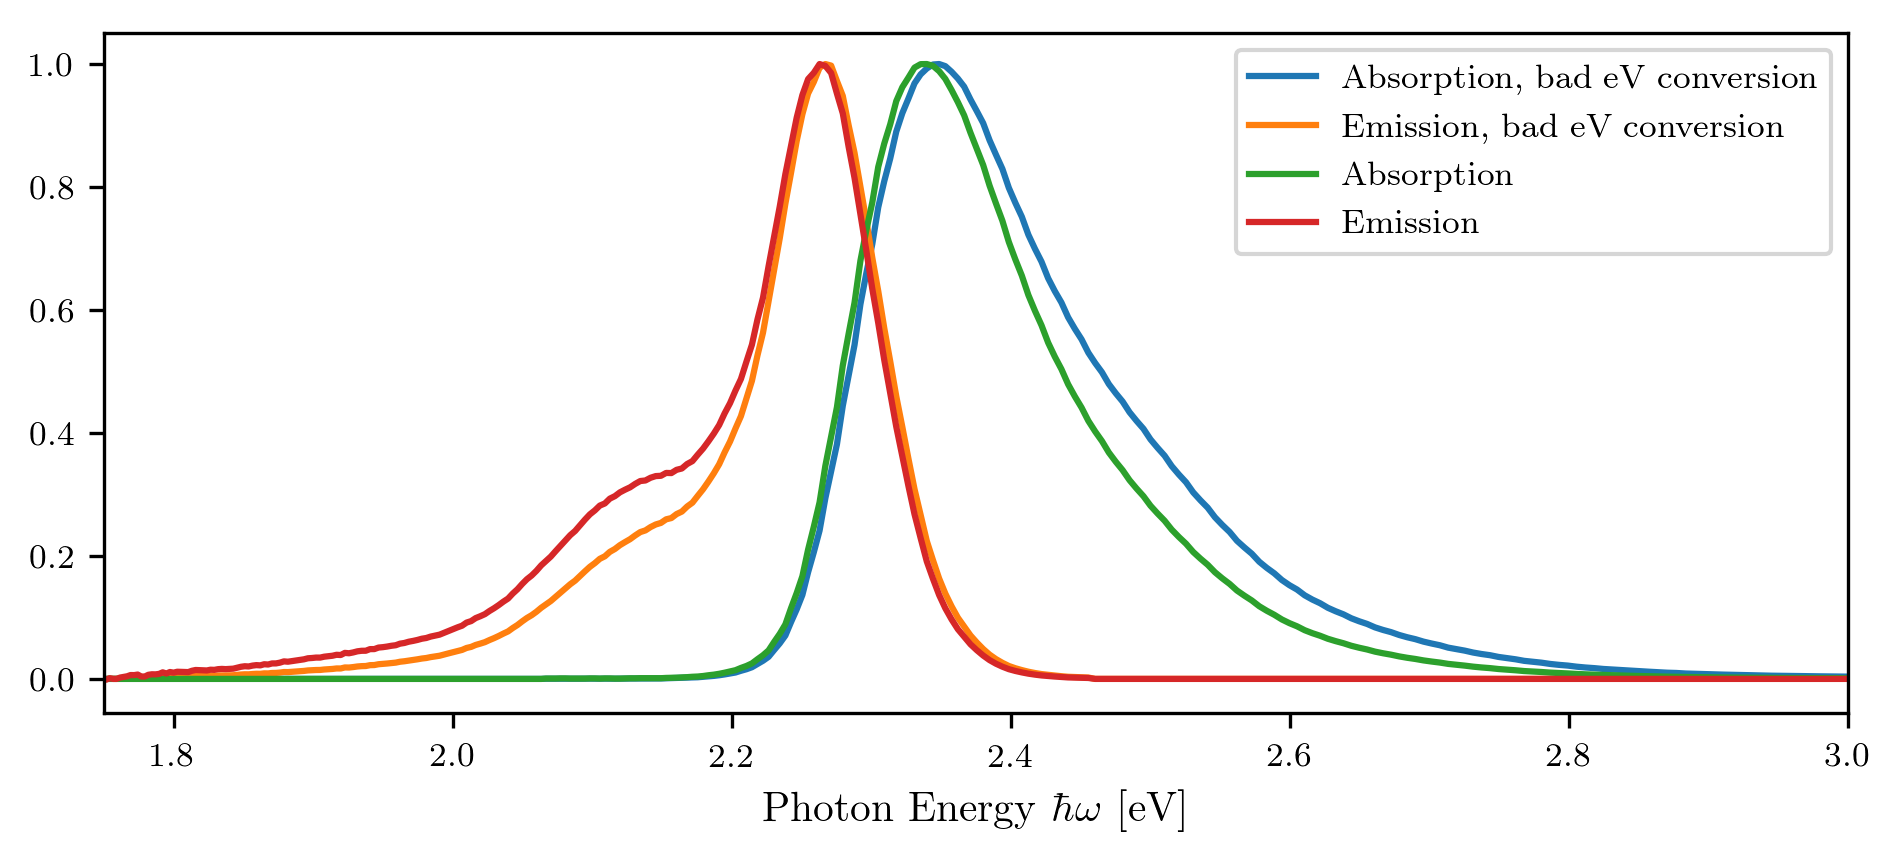

In [57]:
path_to_mol_data = (
    "/Users/chair/Documents/Academia/SuperRes/Biteen_colab/"+
    "Mispolarization/python/gitted/spectral_fitting/")

# R6G_spectrum = sio.loadmat(os.path.join(path_to_mol_data, "R6G_spectrum.mat"))
thermo_fisher_dye_data = np.loadtxt(
    os.path.join(path_to_mol_data, 'BODIPY R6G.csv'), 
    skiprows=1, 
    delimiter=','
    )
# R6G_spectrum.keys()
max_excitation_wavelength = thermo_fisher_dye_data.T[0][np.argmax(thermo_fisher_dye_data.T[1])]
max_excitation_wavelength


def norm_spec(spec):
    return spec/spec.max()

def nm_to_ev_correct(spec):
    return spec/(1240/thermo_fisher_dye_data.T[0])**5.


plt.figure(dpi=300, figsize=(2.5*3,1*3))
plt.plot(
    1240/thermo_fisher_dye_data.T[0], norm_spec(thermo_fisher_dye_data.T[1]), 
    label='Absorption, bad eV conversion')
plt.plot(
    1240/thermo_fisher_dye_data.T[0], norm_spec(thermo_fisher_dye_data.T[2]), 
    label='Emission, bad eV conversion')

plt.plot(
    1240/thermo_fisher_dye_data.T[0], 
    norm_spec(nm_to_ev_correct(thermo_fisher_dye_data.T[1])), 
    label='Absorption')
plt.plot(
    1240/thermo_fisher_dye_data.T[0], 
    norm_spec(nm_to_ev_correct(thermo_fisher_dye_data.T[2])), 
    label='Emission')

plt.legend()
plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

# R6G_emis = R6G_spectrum["bdpr6g"]
# # R6G_spectrum.shape

# # R6G_spectrum[1,:5]
# # plt.figure(dpi=150)
# plt.plot(1240/R6G_emis[0], R6G_emis[1])
# plt.title('R6G Emission from Curly')
# plt.xlabel('eV')

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

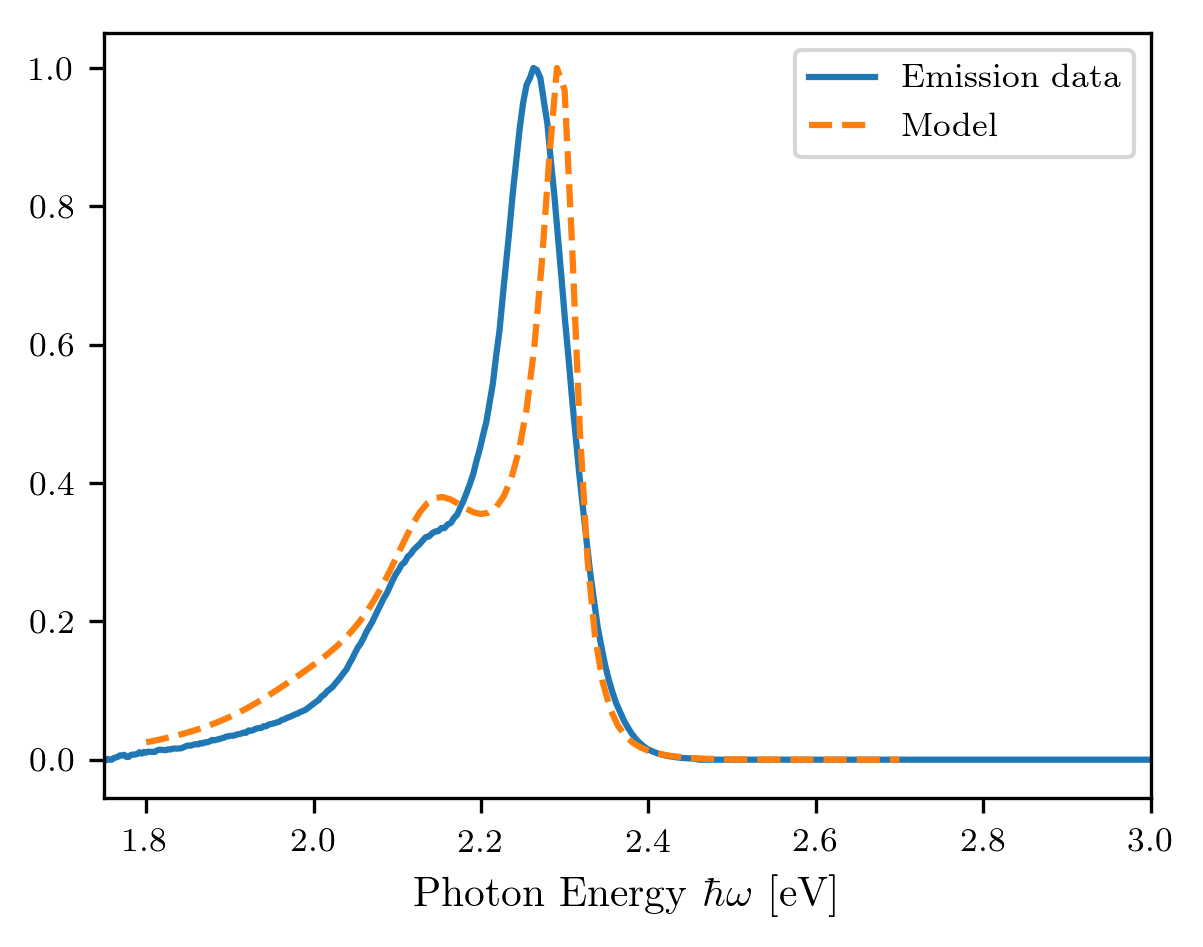

In [60]:

model = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

plt.plot(
    1240/thermo_fisher_dye_data.T[0], 
    norm_spec(nm_to_ev_correct(thermo_fisher_dye_data.T[2])), 
    label='Emission data')

plt.plot(hbar_omegas, norm_spec(model), ls='--', label='Model')

plt.legend()
plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

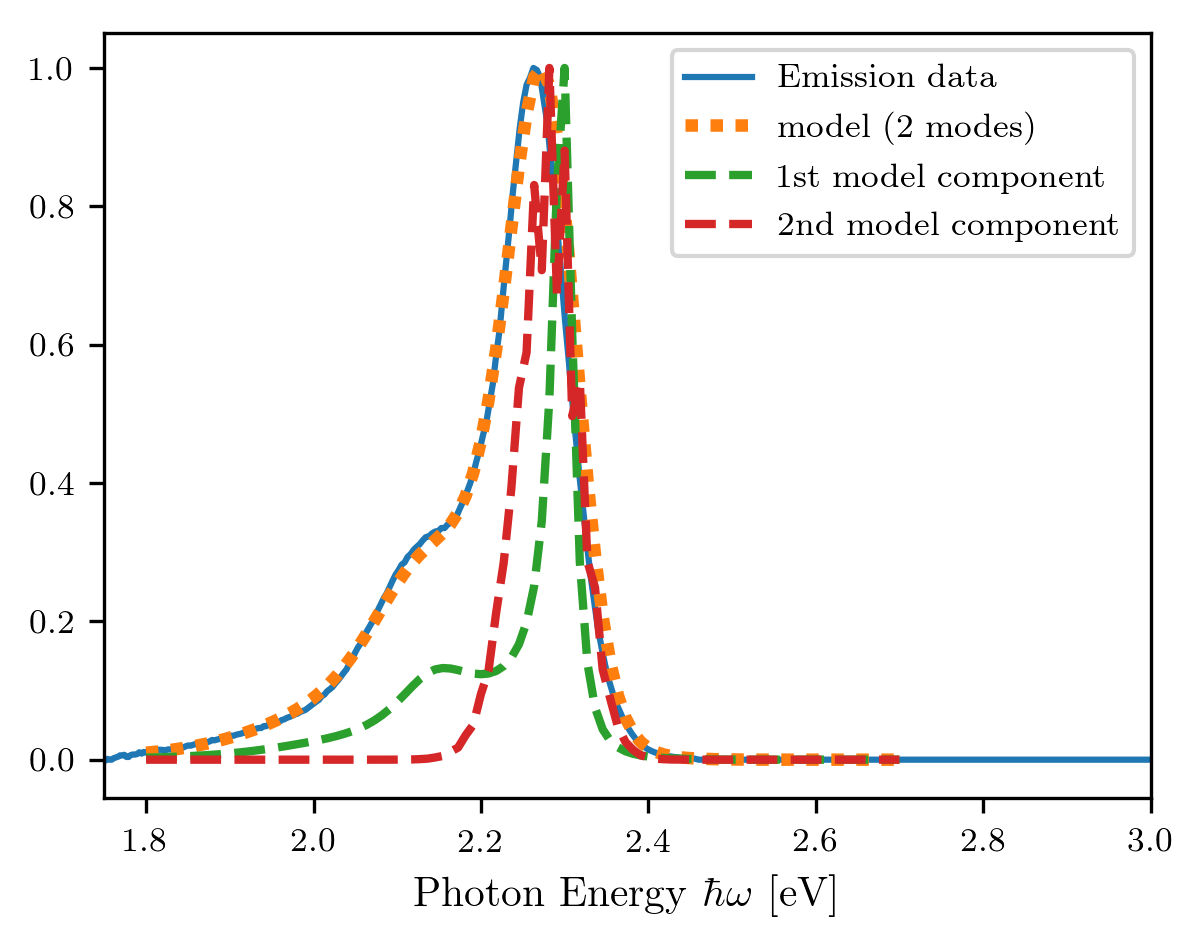

In [85]:
test_model_2_mode = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.3,
    script_d=[.9, 1.6],
    hbar_omega_0=[.17, .017],
    hbar_gamma=[.1, .001],
    T=350,)

model_2_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)


plt.plot(
    1240/thermo_fisher_dye_data.T[0], 
    norm_spec(nm_to_ev_correct(thermo_fisher_dye_data.T[2])), 
    label='Emission data')

plt.plot(hbar_omegas, norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(hbar_omegas, norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(hbar_omegas, norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')

plt.legend()
plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

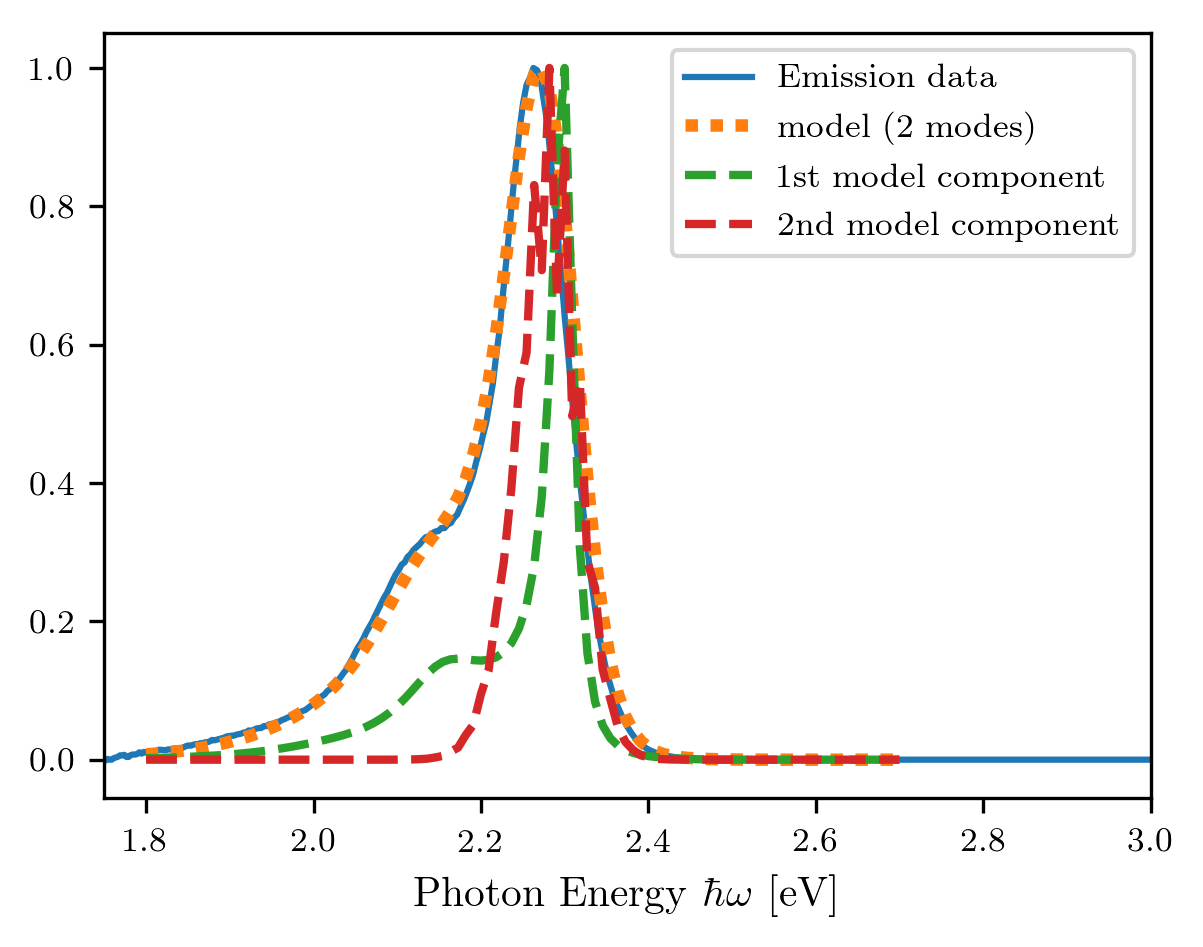

In [91]:
test_model_2_mode = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.3,
    script_d=[.9, 1.6],
    hbar_omega_0=[.16, .017],
    hbar_gamma=[.1, .001],
    T=350,)

model_2_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)


plt.plot(
    1240/thermo_fisher_dye_data.T[0], 
    norm_spec(nm_to_ev_correct(thermo_fisher_dye_data.T[2])), 
    label='Emission data')

plt.plot(hbar_omegas, norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(hbar_omegas, norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(hbar_omegas, norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')

plt.legend()
plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

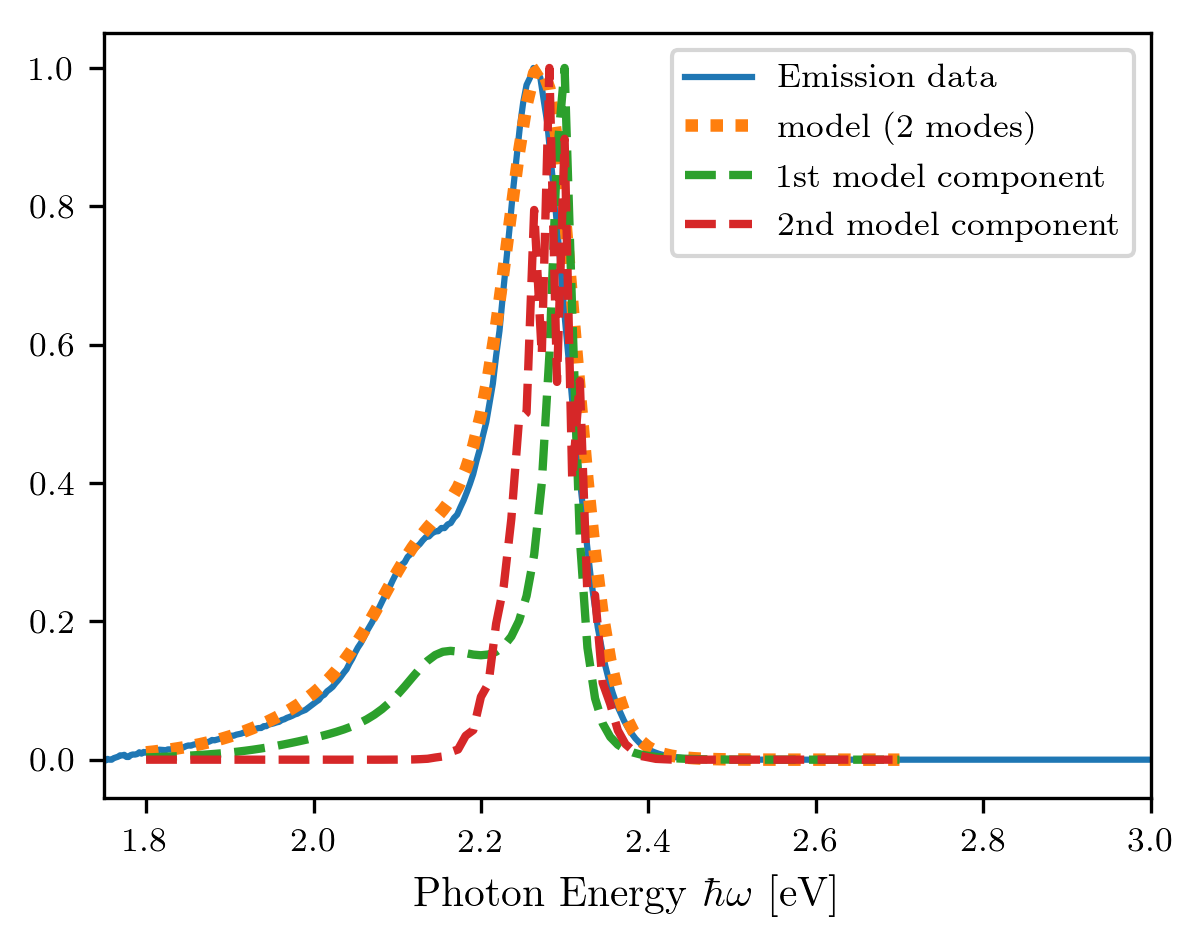

In [96]:
test_model_2_mode = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.3,
    script_d=[.93, 1.6],
    hbar_omega_0=[.165, .017],
    hbar_gamma=[.1, .0008],
    T=350,)

model_2_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)


plt.plot(
    1240/thermo_fisher_dye_data.T[0], 
    norm_spec(nm_to_ev_correct(thermo_fisher_dye_data.T[2])), 
    label='Emission data')

plt.plot(hbar_omegas, norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(hbar_omegas, norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(hbar_omegas, norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')

plt.legend()
plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

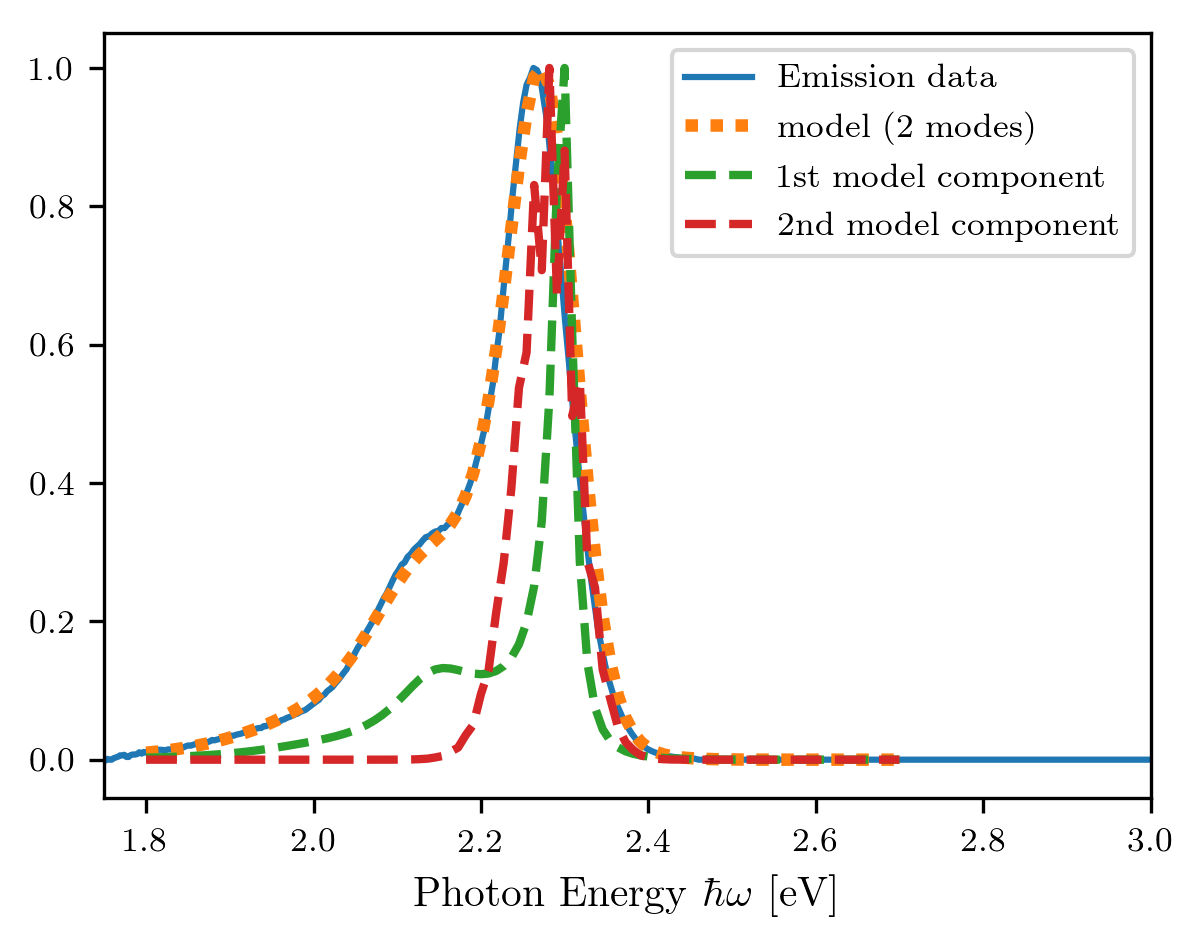

In [85]:
test_model_2_mode = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.3,
    script_d=[.9, 1.6],
    hbar_omega_0=[.17, .017],
    hbar_gamma=[.1, .001],
    T=350,)

model_2_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)


plt.plot(
    1240/thermo_fisher_dye_data.T[0], 
    norm_spec(nm_to_ev_correct(thermo_fisher_dye_data.T[2])), 
    label='Emission data')

plt.plot(hbar_omegas, norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(hbar_omegas, norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(hbar_omegas, norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')

plt.legend()
plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Try Emily Data

In [98]:
emily_data = np.loadtxt(
    os.path.join(path_to_mol_data, 'CN.csv'), 
#     skiprows=0, 
    delimiter=','
    )

In [102]:
emily_data

array([[ 2.88552e+00, -1.68000e-02],
       [ 2.88378e+00,  1.51000e-03],
       [ 2.88205e+00,  8.04000e-03],
       ...,
       [ 2.09468e+00,  2.40200e-01],
       [ 2.09376e+00,  2.43850e-01],
       [ 2.09284e+00,  8.92800e-02]])

In [121]:
dom.invcmtohz(823)*hbar

0.10203899444999716

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

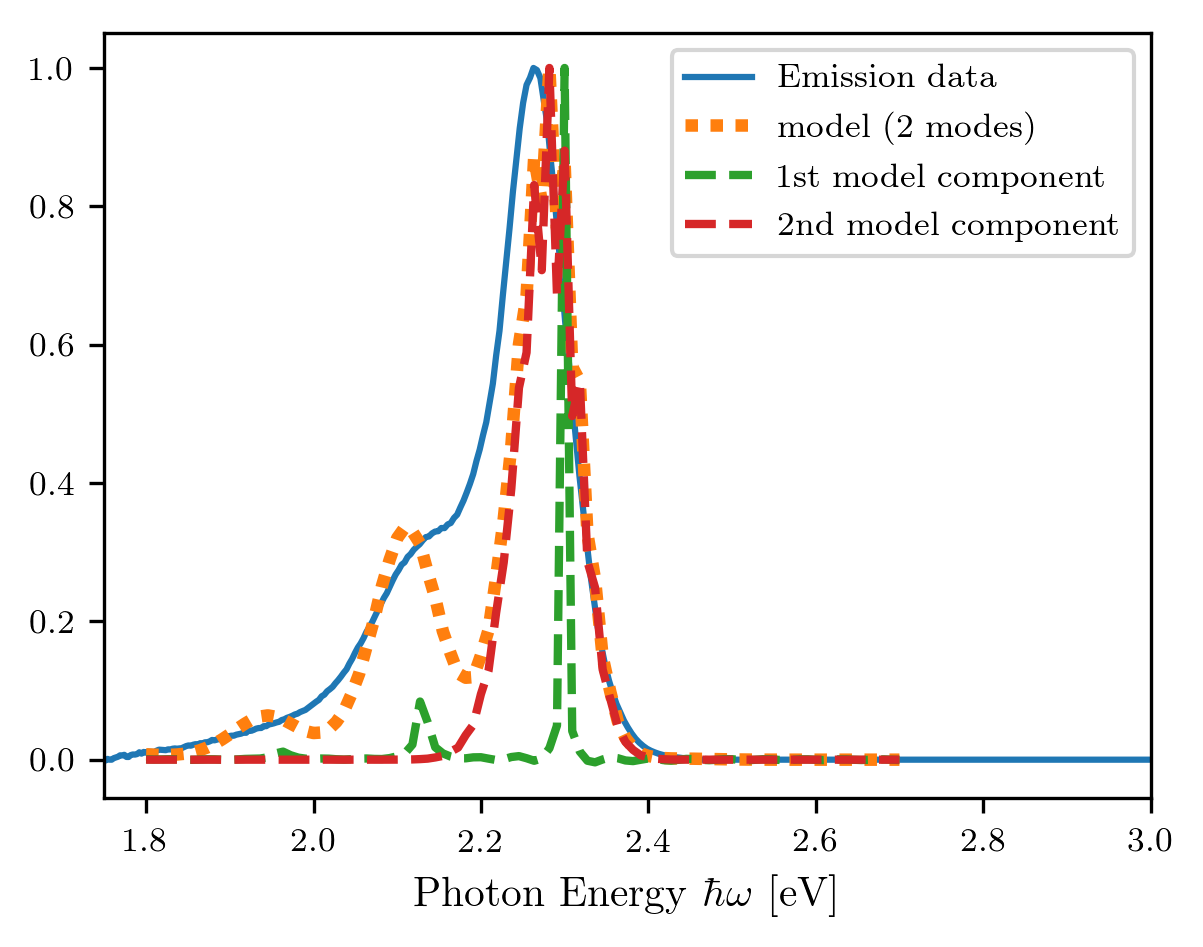

In [126]:
test_model_2_mode = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.3,
    script_d=[.9, 1.6],
    hbar_omega_0=[.17, .017],
    hbar_gamma=[.01, .001],
    T=350,)

model_2_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = test_model_2_mode.emission_lineshape(
    hbar_omegas/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)


plt.plot(
    1240/thermo_fisher_dye_data.T[0], 
    norm_spec(nm_to_ev_correct(thermo_fisher_dye_data.T[2])), 
    label='Emission data')

plt.plot(hbar_omegas, norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(hbar_omegas, norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(hbar_omegas, norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')

plt.legend()
plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

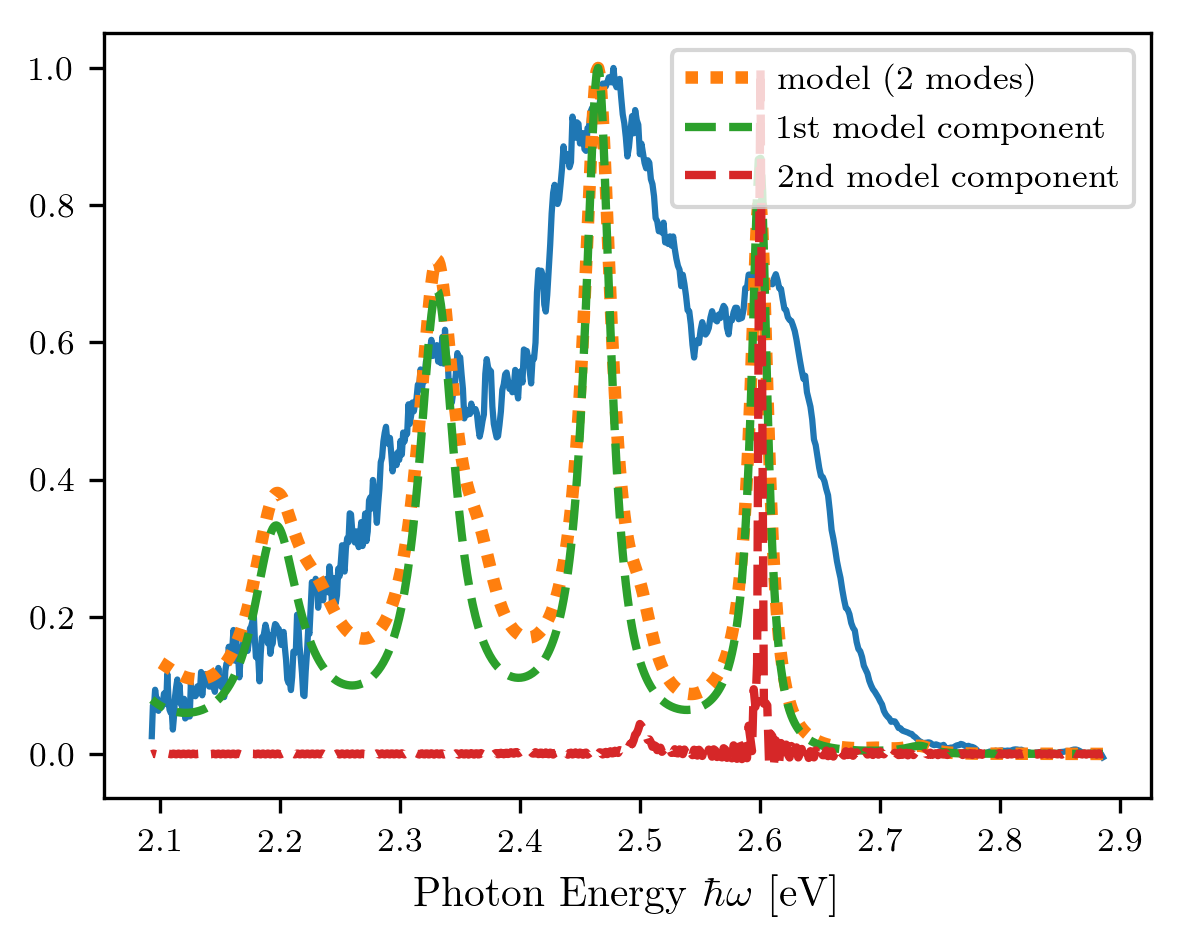

In [128]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.6,
    script_d=[1.9, .6],
    hbar_omega_0=[0.135, .1],
    hbar_gamma=[.01, .01],
    T=350,)

model_2_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')


plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

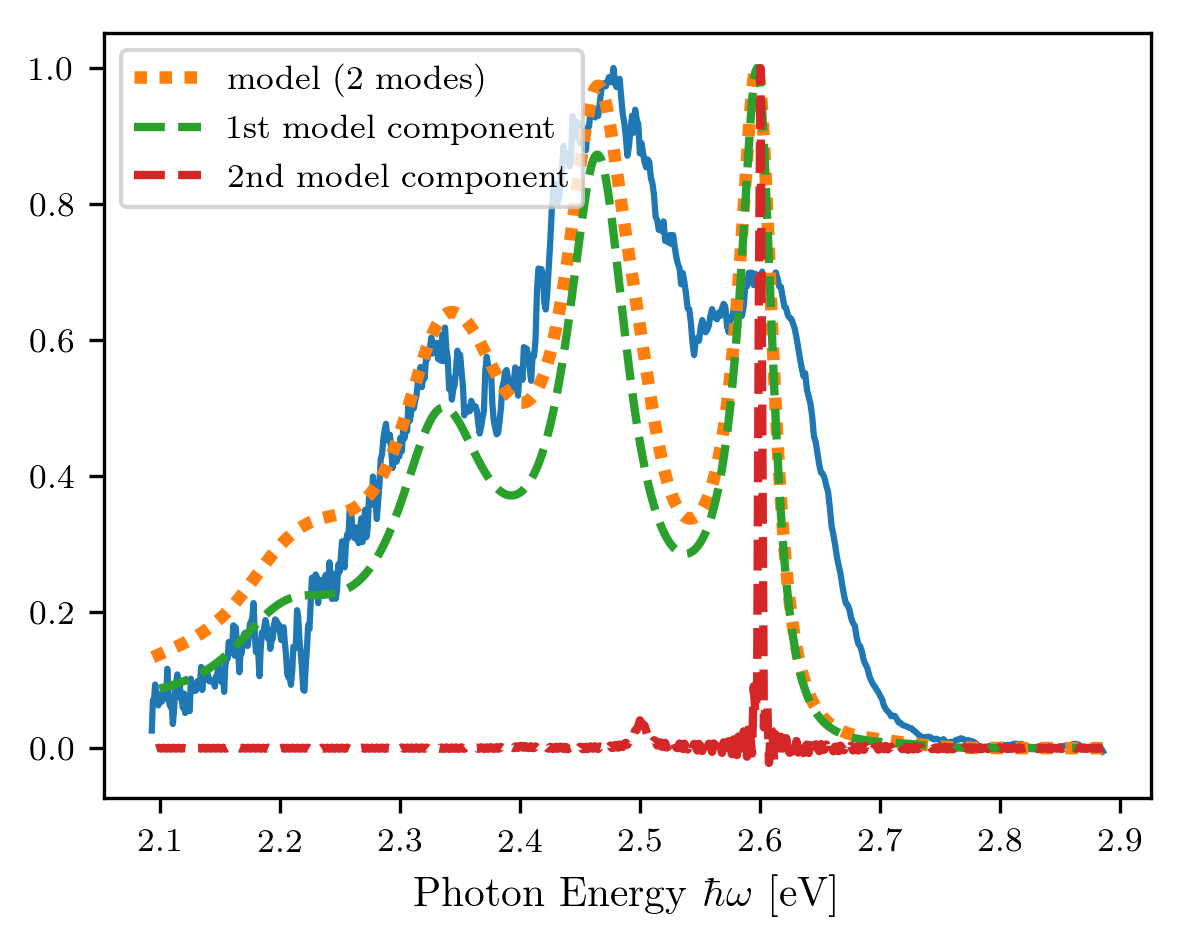

In [131]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.6,
    script_d=[1.7, .6],
    hbar_omega_0=[0.135, .1],
    hbar_gamma=[.03, .01],
    T=300,)

model_2_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')


plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

In [134]:
dom.invcmtohz(400)*hbar

0.049593678955041146

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

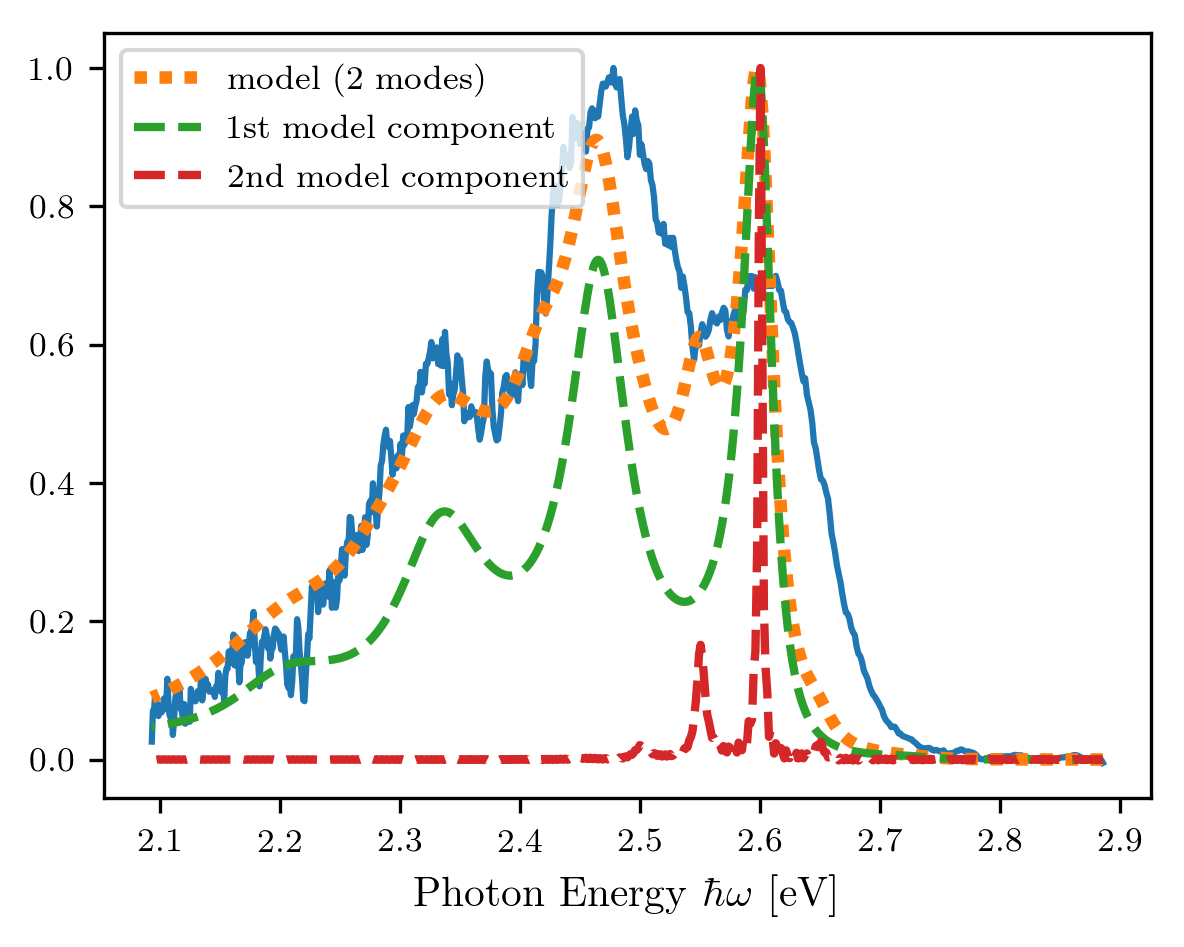

In [136]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.6,
    script_d=[1.6, .8],
    hbar_omega_0=[0.135, .05],
    hbar_gamma=[.03, .005],
    T=300,)

model_2_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')


plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

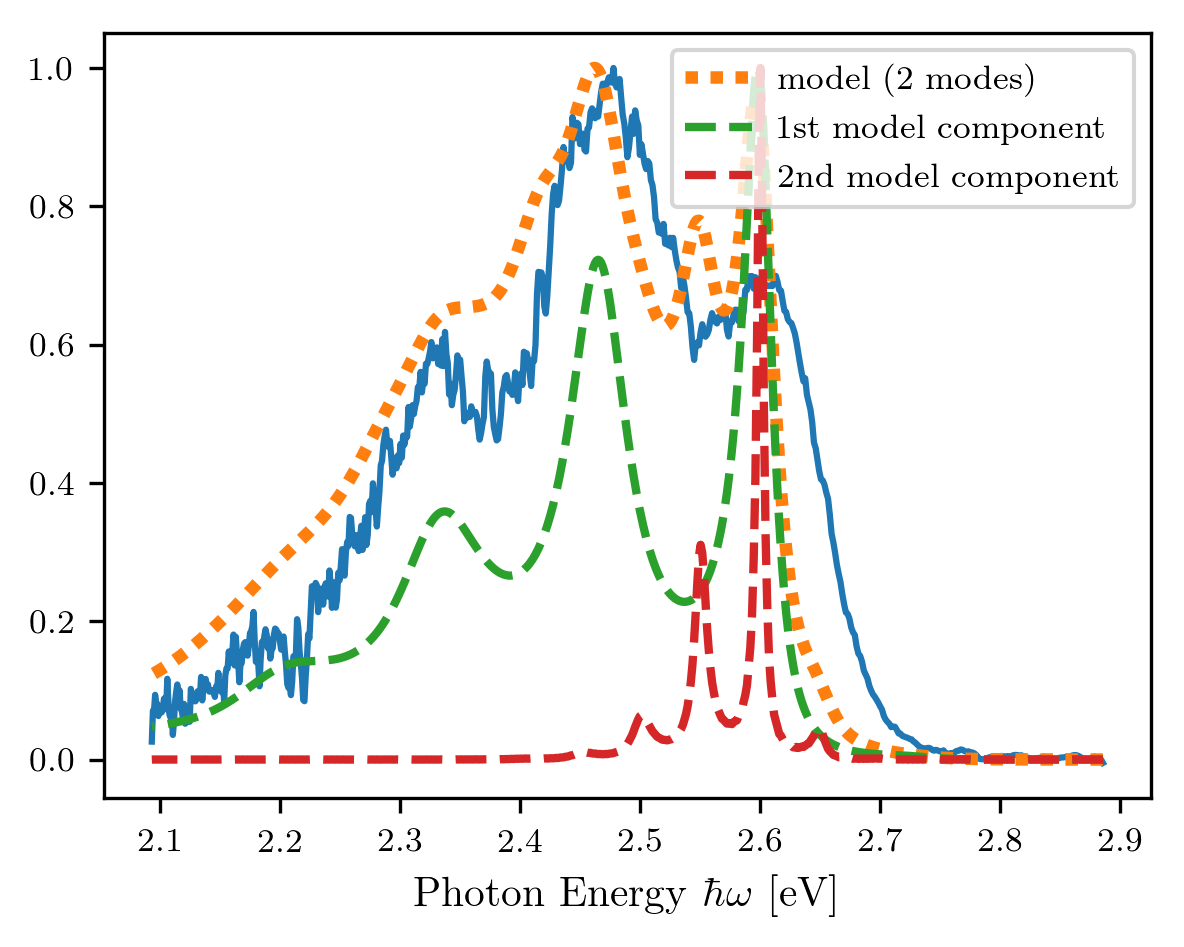

In [140]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=2,
#     hbar_omega_eg_0=2.654,
    hbar_omega_eg_0=2.6,
    script_d=[1.6, 1.0],
    hbar_omega_0=[0.135, .05],
    hbar_gamma=[.03, .006],
    T=300,)

model_2_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')


plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

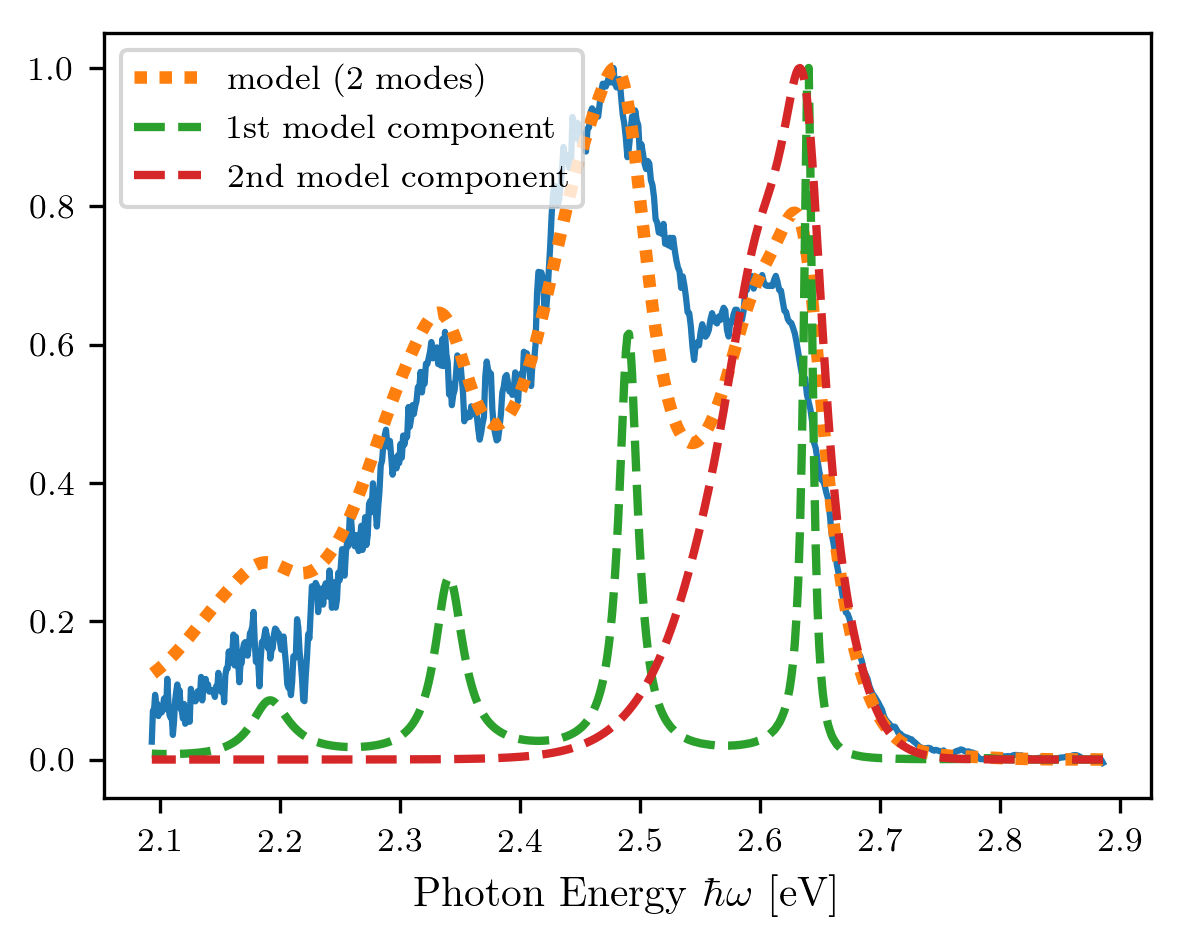

In [152]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.64,
    script_d=[1.6, 1.2],
    hbar_omega_0=[0.15, .05],
    hbar_gamma=[.01, .03],
    T=300,)

model_2_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')


plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

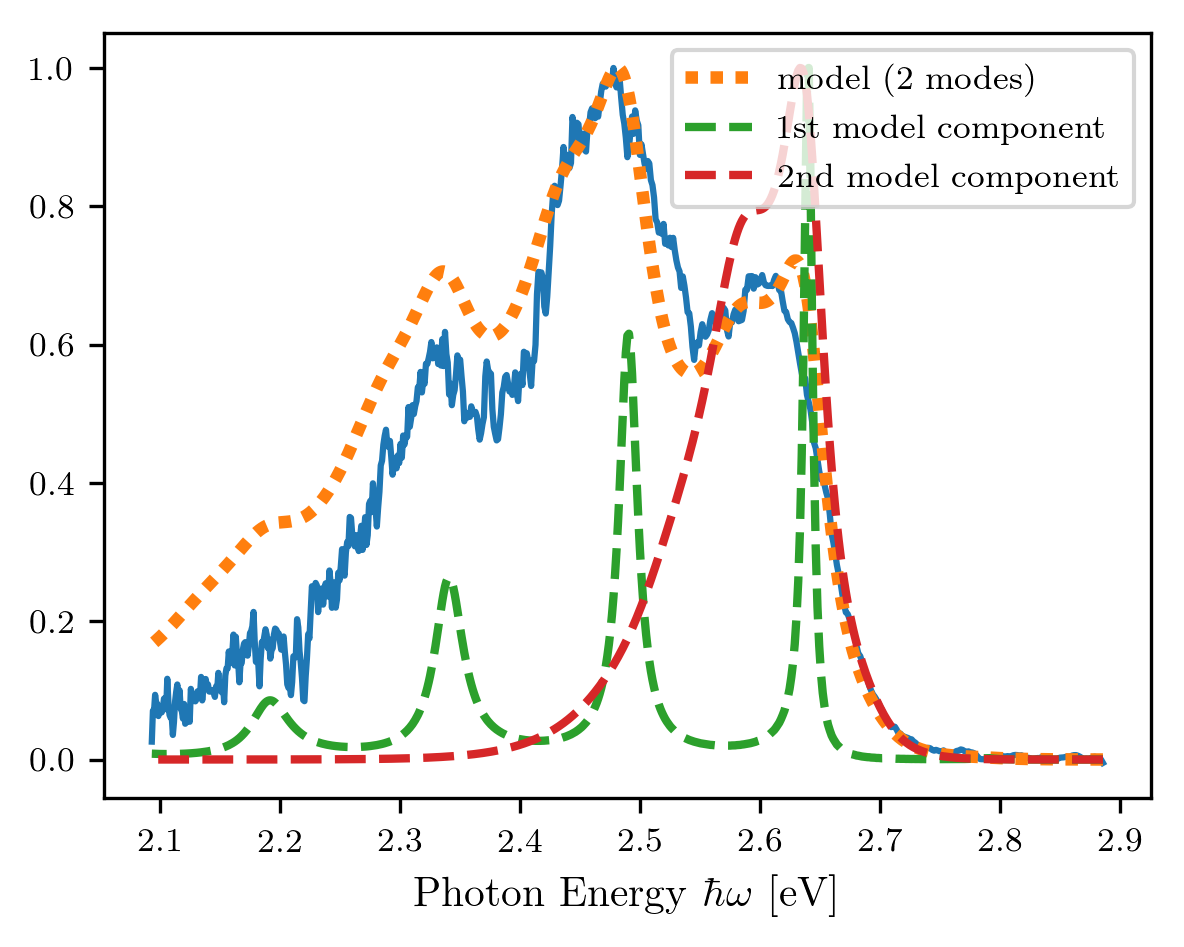

In [153]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.64,
    script_d=[1.6, 1.3],
    hbar_omega_0=[0.15, .06],
    hbar_gamma=[.01, .03],
    T=300,)

model_2_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')


plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

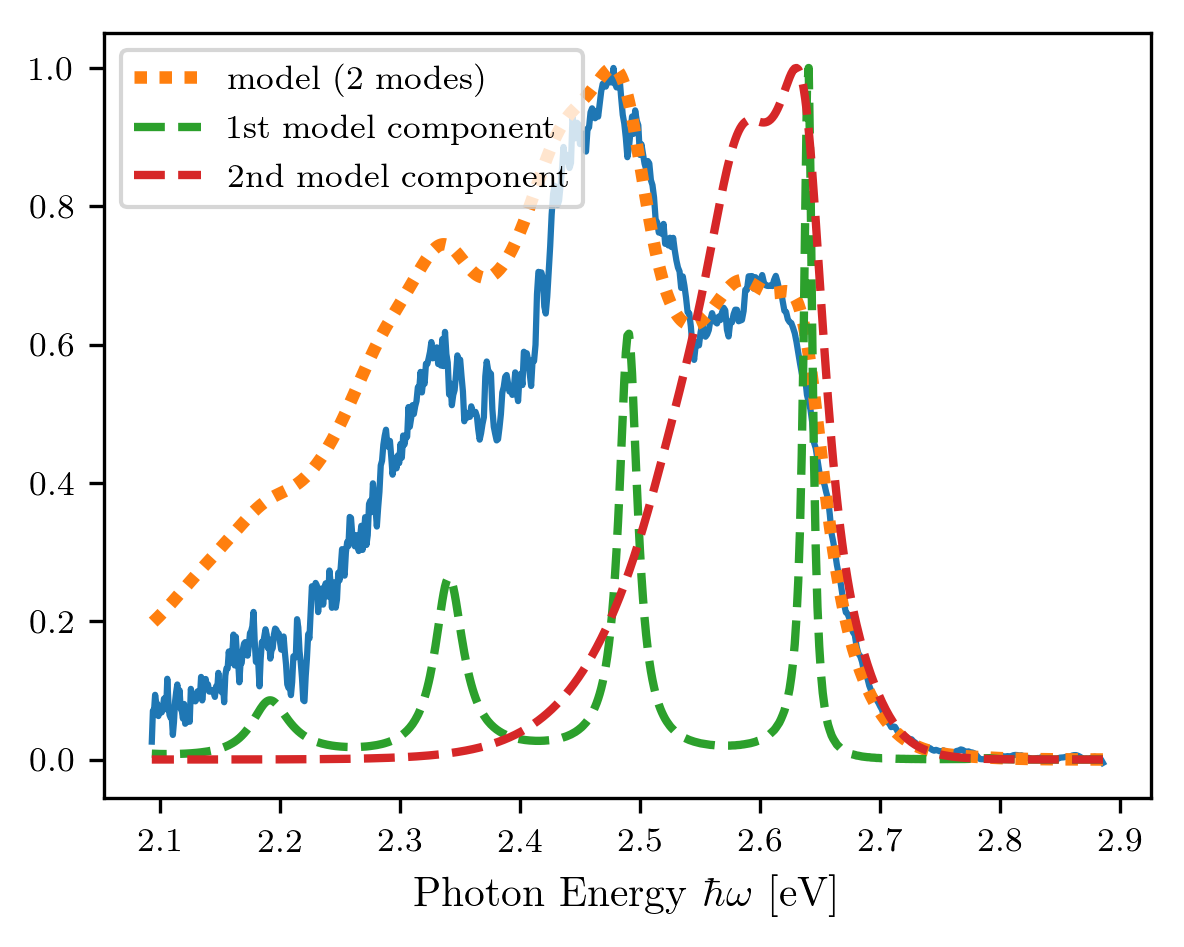

In [156]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.64,
    script_d=[1.6, 1.4],
    hbar_omega_0=[0.15, .06],
    hbar_gamma=[.01, .03],
    T=300,)

model_2_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')


plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

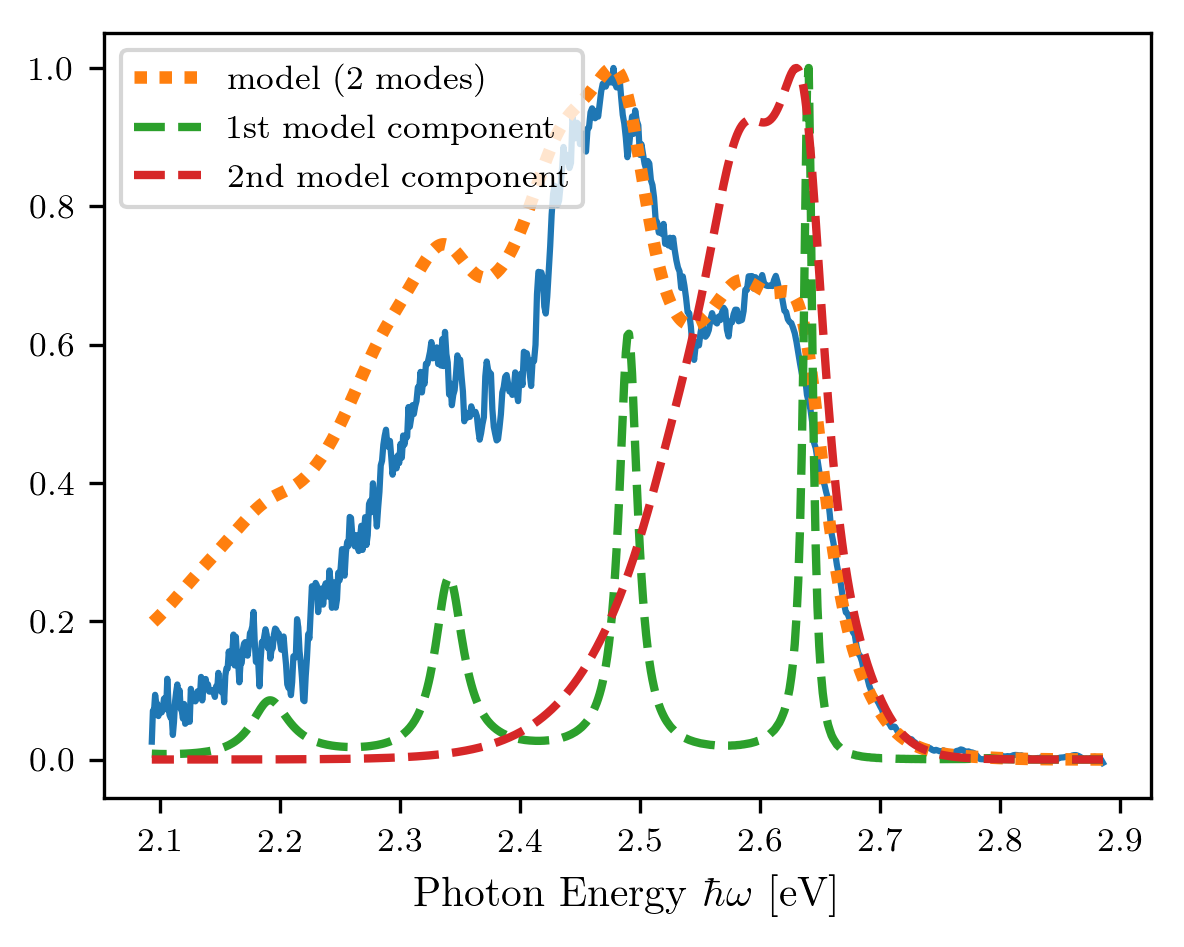

In [156]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.64,
    script_d=[1.6, 1.4],
    hbar_omega_0=[0.15, .06],
    hbar_gamma=[.01, .03],
    T=300,)

model_2_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')


plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

Back to the pretty one

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

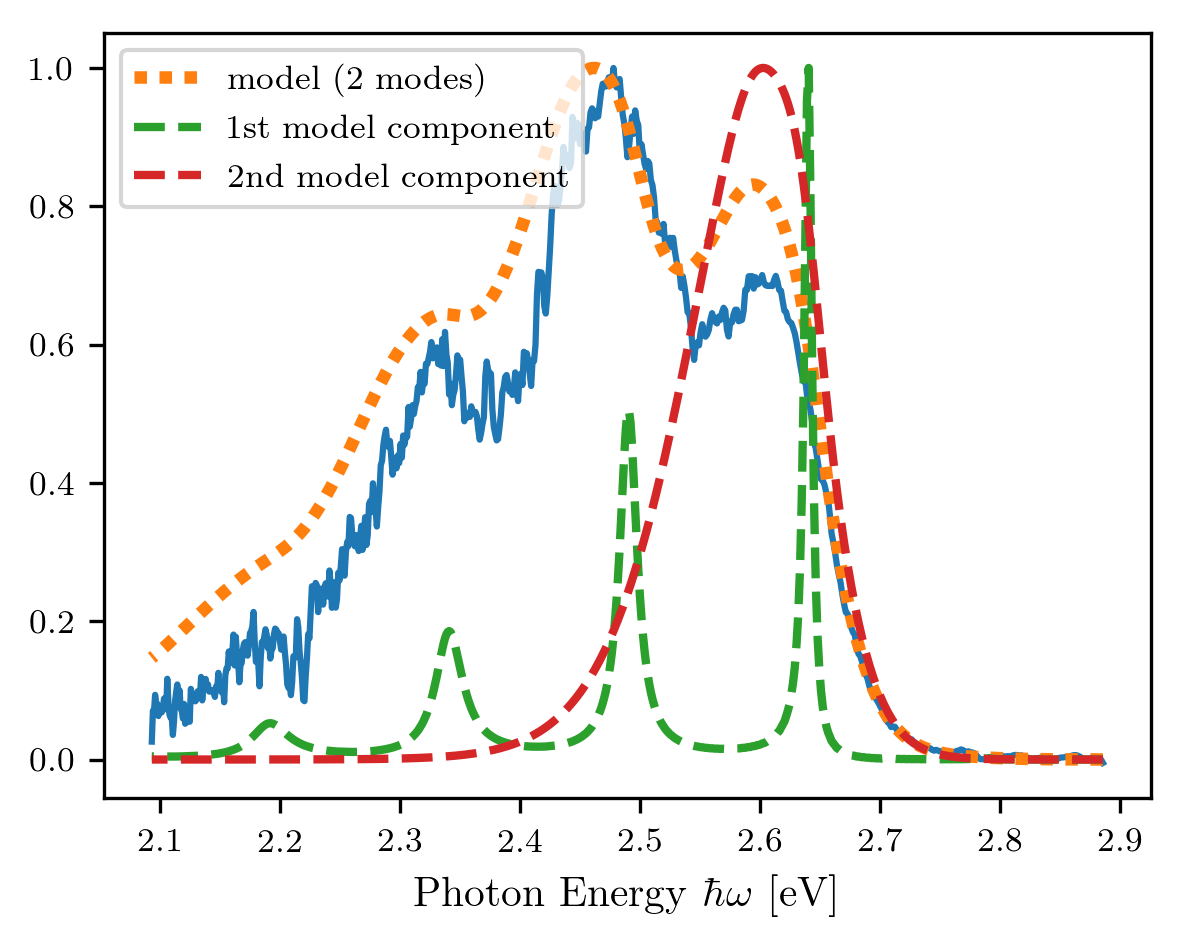

In [161]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.64,
    script_d=[1.5, 1.5],
    hbar_omega_0=[0.15, .05],
    hbar_gamma=[.01, .03],
    T=300,)

model_2_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 10000)

model_1st_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 10000)

model_2nd_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 10000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')


plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

# 04/23 
Going to try fitting, but first figure out if I can get the integration faster

Text(0.5, 0, 'Photon Energy $\\hbar\\omega$ [eV]')

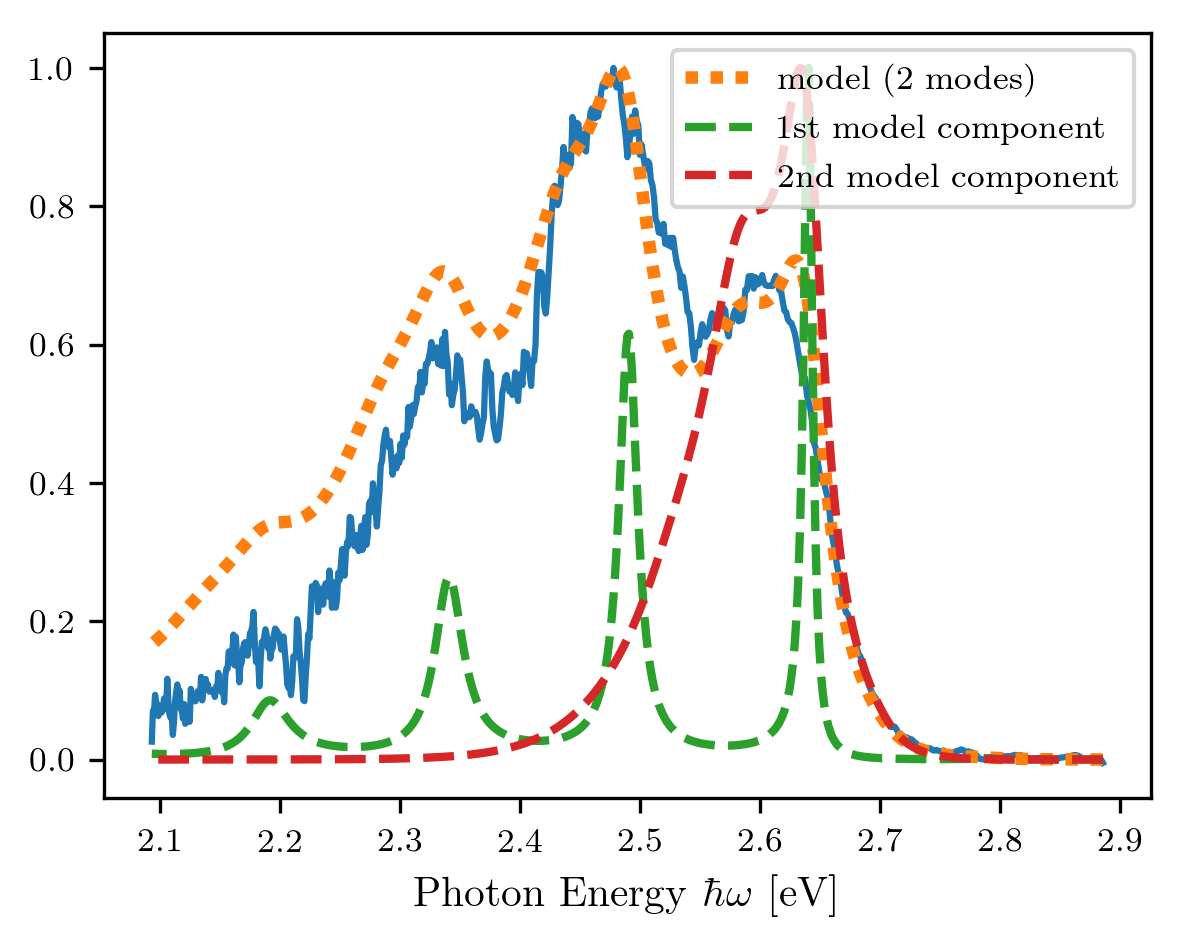

In [173]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=2,
    hbar_omega_eg_0=2.64,
    script_d=[1.6, 1.3],
    hbar_omega_0=[0.15, .06],
    hbar_gamma=[.01, .03],
    T=300,)

model_2_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 1000)

model_1st_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 1000)

model_2nd_mode = emily_model.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 1000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')


plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel('Photon Energy $\hbar\omega$ [eV]', fontsize=10)

In [197]:
def model_from_params(params, num_modes):
    return dom.mol_fluo_model(
        num_vib_modes=num_modes,
        hbar_omega_eg_0=float(params[0]),
        script_d=params[2+2*num_modes: 2+3*num_modes],
        hbar_omega_0=params[2: 2+1*num_modes],
        hbar_gamma=params[2+1*num_modes: 2+2*num_modes],
        T=params[1],)

def muk_mol_fit_fun(params, *args):
    """ Try naive fit function with fixed integration differential size
        and bound.

        Params: (list of fit parameters) Should be list of 
            2 + (3*num_modes) containing the following model parameters;
            ~~~~~~~~~~~~~~~~
            [0] hbar_omega_eg_0: the difference in zero point energy of 
                the vibrational oscillators between the two electronic
                states (eV).
                
            [1] T: temperature 
            
            [2:2+num_modes] hbar_omega_0: vibrational ressonance energy 
                in eV.
                
            [2+num_modes:2+2*num_modes] hbar_gamma: damping rate from 
                solvent or etc.
                
            [2+2*num_modes: 2+3*num_modes]script_d: unitless 
                displacement of the vibronic potential surface between
                electronic states.

        Args: (list of x axis and data)
        ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            hbar_omega:
            data:
            num_modes:
        """
#     print(f'params:{params}, args:{args}')
    ## Define params and args with meaningful names
#     hbar_omega_eg_0, T, hbar_omega_0, hbar_gamma, script_d, = params
    ## params are ordered by 
    hbar_omegas, data, num_modes, t_bound, t_points, norm = args

    model_instance = model_from_params(params, num_modes)
    
    model = model_instance.emission_lineshape(
        hbar_omegas/hbar,
        t_bound=t_bound,
        t_points=t_points,)

    ## Normalize model and data
    model = model / np.max(model)
    data = data / np.max(data)

    return model - data

In [205]:
# num_vib_modes=2,
#     hbar_omega_eg_0=2.64,
#     script_d=[1.6, 1.3],
#     hbar_omega_0=[0.15, .06],
#     hbar_gamma=[.01, .03],
#     T=300,

ini_hbar_omega_eg_0 = 2.64
ini_script_d = [1.6, 1.3]
ini_hbar_omega_0 = [0.15, .06]
ini_hbar_gamma = [.01, .03]
ini_T = 300

fit_ini_guess = np.asarray([
    ini_hbar_omega_eg_0,
    ini_T,
    *ini_hbar_omega_0,
    *ini_hbar_gamma,
    *ini_script_d,
    ])

hbar_omegas_arg = emily_data.T[0]
data_arg = emily_data.T[1]
num_modes_arg = 2
t_bound_arg = 1000
t_points_arg = 1000
norm_arg = True

fit_args = (
    hbar_omegas_arg,
    data_arg,
    num_modes_arg,
    t_bound_arg,
    t_points_arg,
    norm_arg,
    )

model_fit = opt.least_squares(
    muk_mol_fit_fun,
    x0=fit_ini_guess,
    args=fit_args,
    bounds=(0, np.inf)
    )

In [206]:
model_fit['x']

array([2.62553982e+00, 4.00575717e+02, 1.35416639e-01, 6.03105944e-02,
       1.13769119e-38, 3.79506348e-02, 1.44263566e+00, 1.22834494e+00])

In [207]:
fit_ini_guess

array([2.64e+00, 3.00e+02, 1.50e-01, 6.00e-02, 1.00e-02, 3.00e-02,
       1.60e+00, 1.30e+00])

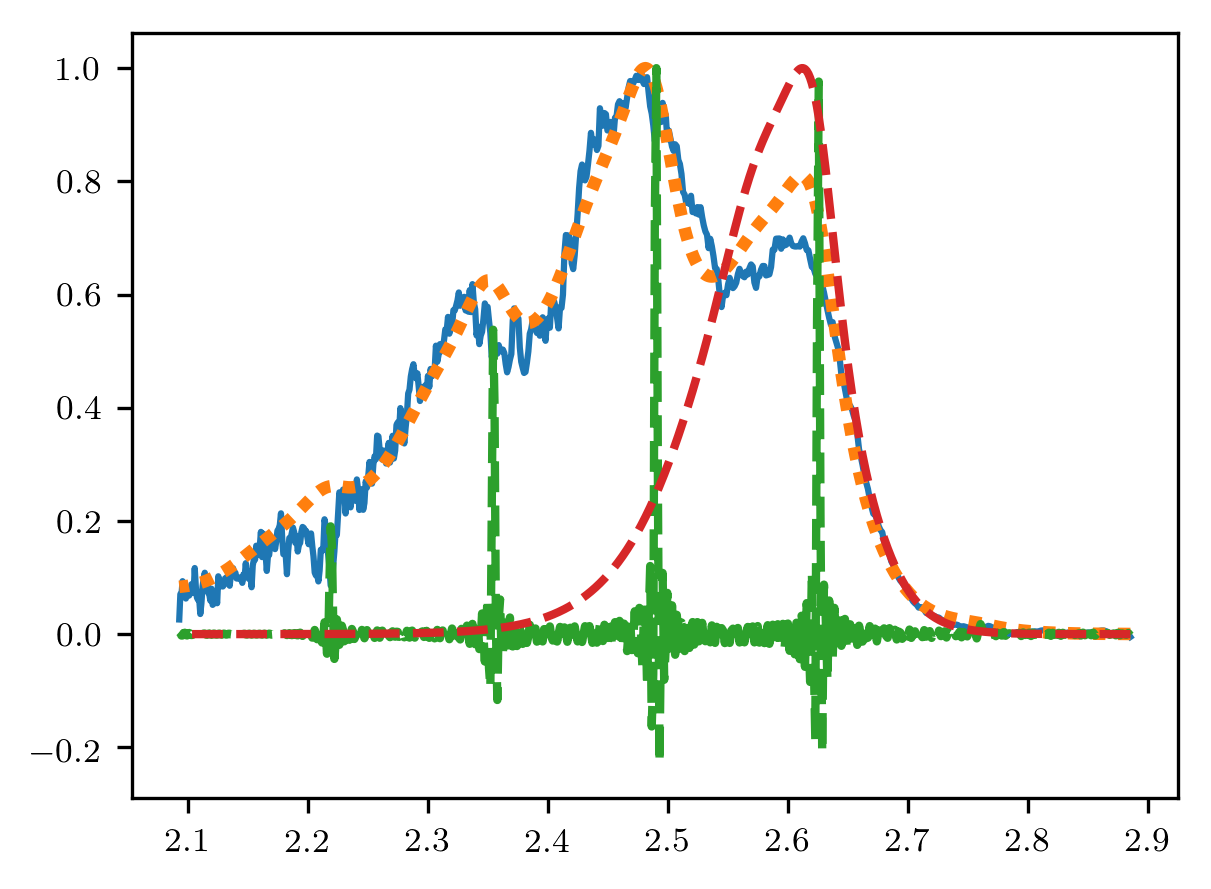

In [214]:
model_fit_inst = model_from_params(model_fit['x'], 2)

model_2_mode = model_fit_inst.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 1000)

model_1st_mode = model_fit_inst.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 1000)

model_2nd_mode = model_fit_inst.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 1000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')

Is the cost func really less at returned fit?

In [209]:
model_fit.cost

0.8729682891545509

In [210]:
np.sum(muk_mol_fit_fun(fit_ini_guess, *fit_args)**2.)

7.446021511502571

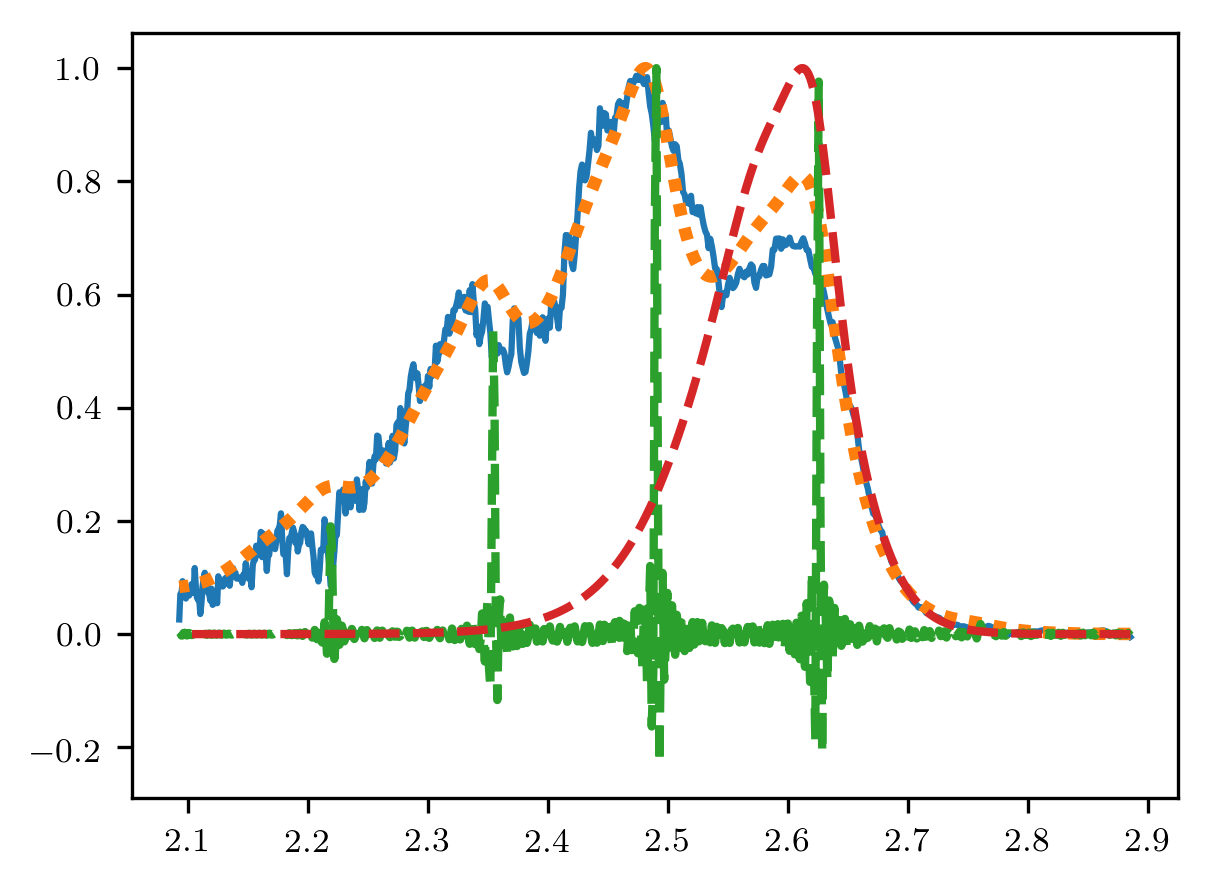

In [220]:
model_fit_inst = model_from_params(model_fit['x'], 2)

model_2_mode = model_fit_inst.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 100000)

model_1st_mode = model_fit_inst.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 100000)

model_2nd_mode = model_fit_inst.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 100000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]))

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls=(0, (1, 1)), lw=3, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls='--', lw=2, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls='--', lw=2, label='2nd model component')

Text(0, 0.5, 'Normalized Emission Probability')

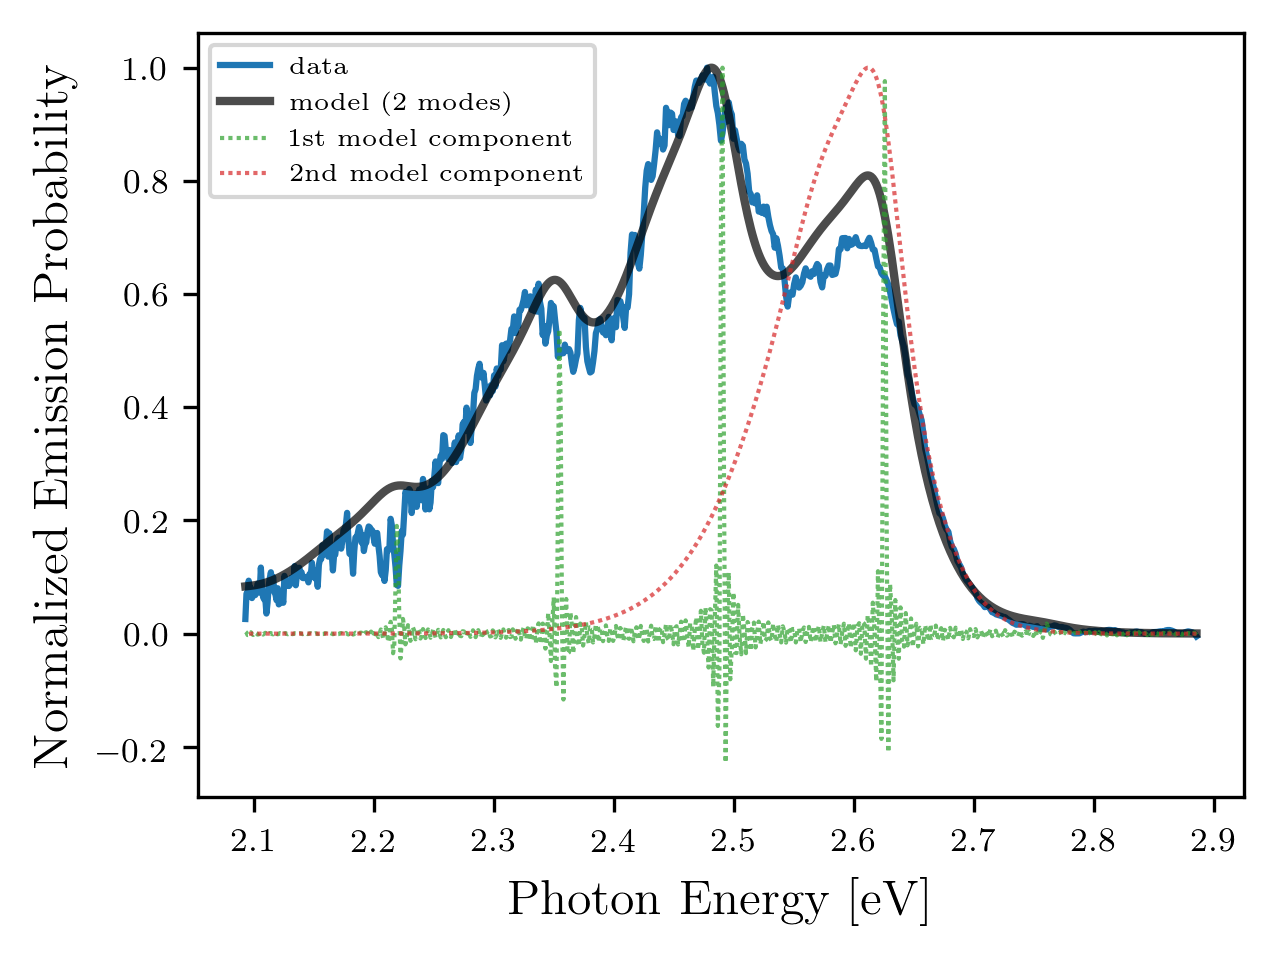

In [240]:
model_fit_inst = model_from_params(model_fit['x'], 2)

model_2_mode = model_fit_inst.emission_lineshape(
    emily_data.T[0]/hbar,
#     mode_idx,
    t_bound = 1000,
    t_points = 1000)

model_1st_mode = model_fit_inst.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=0,
    t_bound = 1000,
    t_points = 1000)

model_2nd_mode = model_fit_inst.emission_lineshape(
    emily_data.T[0]/hbar,
    mode_idx=1,
    t_bound = 1000,
    t_points = 1000)

plt.plot(emily_data.T[0], norm_spec(emily_data.T[1]), label='data')

plt.plot(emily_data.T[0], norm_spec(model_2_mode), ls='-', lw=2, c='k', alpha=0.7, label='model (2 modes)')
plt.plot(emily_data.T[0], norm_spec(model_1st_mode), ls=(0, (1, 1)), lw=1, c='C2', alpha=0.7, label='1st model component')
plt.plot(emily_data.T[0], norm_spec(model_2nd_mode), ls=(0, (1, 1)), lw=1, c='C3', alpha=0.7, label='2nd model component')
plt.legend(fontsize=6)
plt.xlabel('Photon Energy [eV]')
plt.ylabel('Normalized Emission Probability')

In [241]:
model_fit['x']

array([2.62553982e+00, 4.00575717e+02, 1.35416639e-01, 6.03105944e-02,
       1.13769119e-38, 3.79506348e-02, 1.44263566e+00, 1.22834494e+00])

In [ ]:
2.62553982e+00, 4.00575717e+02, 1.35416639e-01, 6.03105944e-02,
       1.13769119e-38, 3.79506348e-02, 1.44263566e+00, 1.22834494e+00
hbar_omega_eg_0=2.62553982e+00,
T=4.00575717e+02,
hbar_omega_0=[1.35416639e-01, 6.03105944e-02,],
hbar_gamma=[1.13769119e-38, 3.79506348e-02],
script_d=[1.44263566e+00, 1.22834494e+00],